In [23]:
from IPython.display import Audio
import librosa
from librosa import display
import numpy as np
import scipy
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [24]:
!pip install librosa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
y, sr = librosa.load('/content/drive/MyDrive/PSV-proiect/data-set/genres_original/reggae/reggae.00004.wav', sr = 22050) # Use the default sampling rate of 22,050 Hz

In [27]:
Audio(y, rate = sr)

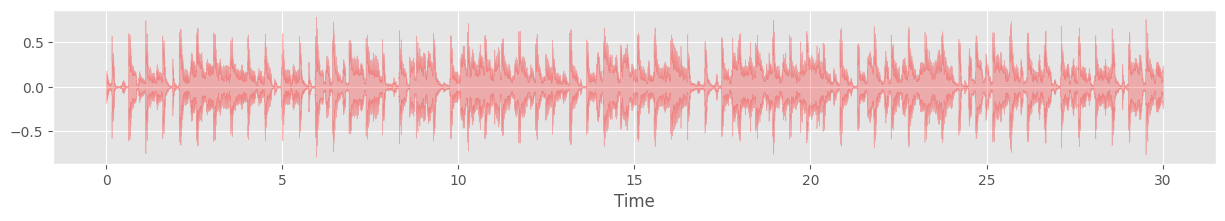

In [28]:
plt.figure(figsize=(15,2))
librosa.display.waveshow(y  = y,
                     sr     = sr, 
                     alpha  = 0.25, 
                     color  = 'red')

### Part I: Time Domain Features

1) Statistical moments calculated on the raw audio

In [29]:
print('Signal mean = {:.2f}'.format(np.mean(abs(y))))
print('Signal std dev = {:.2f}'.format(np.std(y)))
print('Signal skewness = {:.2f}'.format(scipy.stats.skew(abs(y))))
print('Signal kurtosis = {:.2f}'.format(scipy.stats.kurtosis(y)))

Signal mean = 0.08
Signal std dev = 0.11
Signal skewness = 1.87
Signal kurtosis = 2.82


2) Zero crossing rate

ZCR mean = 0.08
ZCR std dev = 0.05


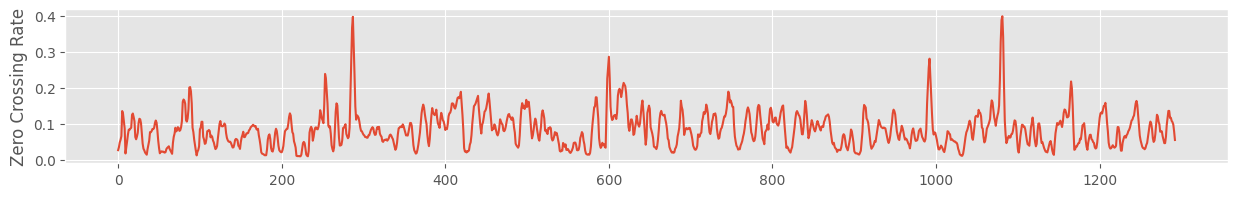

In [30]:
# Add a small constant before computing the zero crossing rate to disregard unwanted silence 'noise'
zcr = librosa.feature.zero_crossing_rate(y + 0.0001, frame_length=2048, hop_length=512)[0]
plt.figure(figsize=(15,2))
plt.plot(zcr)
plt.ylabel('Zero Crossing Rate')
print('ZCR mean = {:.2f}'.format(np.mean(zcr)))
print('ZCR std dev = {:.2f}'.format(np.std(zcr)))

3) Root Mean Squared Energy

RMSE mean = 0.10
RMSE std dev = 0.05


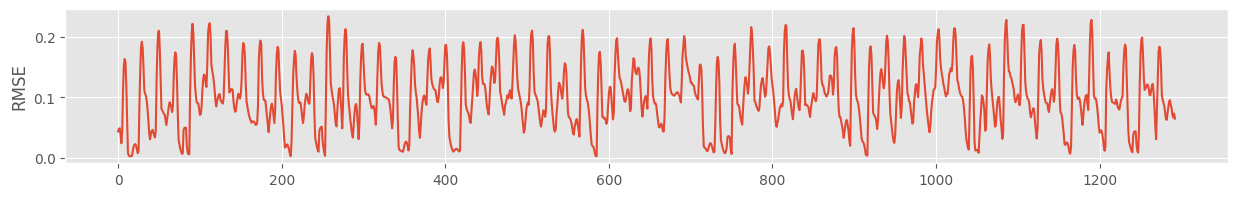

In [31]:
rms = librosa.feature.rms(y=y + 0.0001)[0]
plt.figure(figsize=(15, 2))
plt.plot(rms)
plt.ylabel('RMSE')
print('RMSE mean = {:.2f}'.format(np.mean(rms)))
print('RMSE std dev = {:.2f}'.format(np.std(rms)))

### Part II: Spectral Features

1) Spectral Centroid: frequency area around which most of the signal energy concentrates<br>
$f_c = \frac{\Sigma_k S(k)f(k)}{\Sigma_k S(k)}$<br>
where  S(k) is the spectral magnitude at frequency bin  k <br>
f(k) is the frequency at bin  k

Spectral Centroid mean = 1942.29
Spectral Centroid std dev = 687.87


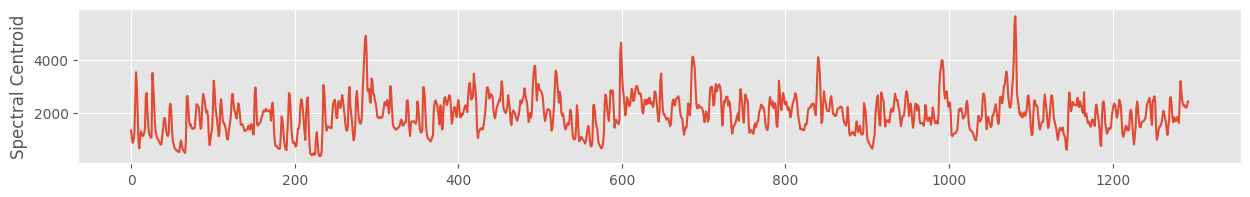

In [32]:
spectral_centroids = librosa.feature.spectral_centroid(y=y+0.01, sr=sr)[0]
plt.figure(figsize=(15, 2))
plt.plot(spectral_centroids)
plt.ylabel('Spectral Centroid')
print('Spectral Centroid mean = {:.2f}'.format(np.mean(spectral_centroids)))
print('Spectral Centroid std dev = {:.2f}'.format(np.std(spectral_centroids)))

2) Spectral Band-width: Other moments calculated around the spectral centroid <br>
$f_c = (\Sigma_k S(k)f(k) - f_c)^\frac{1}{p}$ <br>
When  p=2 this is like a weighted standard deviation.

Spectral Bandwidth-2 mean = 2135.89
Spectral Bandwidth-2 std dev = 429.41
Spectral Bandwidth-3 mean = 2624.11
Spectral Bandwidth-3 std dev = 362.29
Spectral Bandwidth-4 mean = 3072.93
Spectral Bandwidth-4 std dev = 314.40


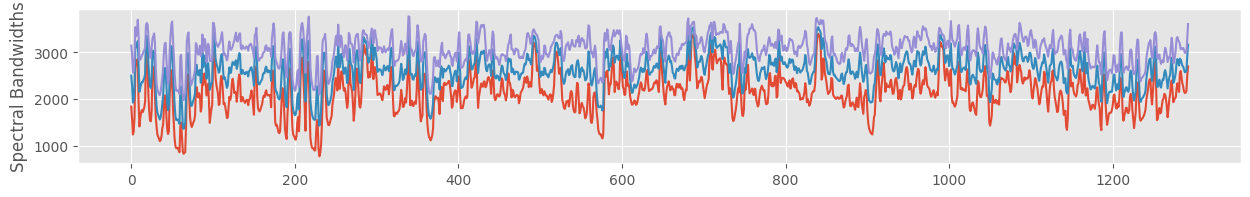

In [33]:
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(y=y+0.01, sr=sr, p=2)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(y=y+0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(y=y+0.01, sr=sr, p=4)[0]
plt.figure(figsize=(15, 2))
plt.plot(spectral_bandwidth_2)
plt.plot(spectral_bandwidth_3)
plt.plot(spectral_bandwidth_4)
plt.ylabel('Spectral Bandwidths')
print('Spectral Bandwidth-2 mean = {:.2f}'.format(np.mean(spectral_bandwidth_2)))
print('Spectral Bandwidth-2 std dev = {:.2f}'.format(np.std(spectral_bandwidth_2)))
print('Spectral Bandwidth-3 mean = {:.2f}'.format(np.mean(spectral_bandwidth_3)))
print('Spectral Bandwidth-3 std dev = {:.2f}'.format(np.std(spectral_bandwidth_3)))
print('Spectral Bandwidth-4 mean = {:.2f}'.format(np.mean(spectral_bandwidth_4)))
print('Spectral Bandwidth-4 std dev = {:.2f}'.format(np.std(spectral_bandwidth_4)))
# Highly Correlated features may cause issues in the model building

3) Spectral Contrast: considers the spectral peak, the spectral valley, and their difference in each frequency subband. Usually, 6 sub-bands

Means [25.41966242 16.34581687 20.25973387 18.85421131 19.5776038  18.31755954
 37.7222341 ]
Std devs [6.34034455 4.60149004 4.98056593 3.7638256  4.53484677 3.35476055
 4.80140551]


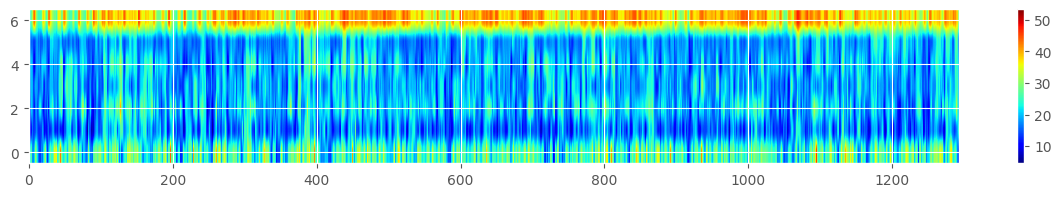

In [34]:
# Frequency cutoff for the first bin `[0, fmin]`
# Subsequent bins will cover `[fmin, 2*fmin]`, `[2*fmin, 4*fmin]
# Bins are on log scale
spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr, n_bands=6, fmin=200.0)
plt.figure(figsize=(15, 2))
plt.imshow(spectral_contrast, aspect='auto', origin='lower', cmap='jet')
plt.colorbar()
print('Means', np.mean(spectral_contrast, axis=1))  # Values are on dB scale
print('Std devs', np.std(spectral_contrast, axis=1))

4) Spectral Roll-off: the frequency below which a specified percentage of the total spectral energy, e.g. 85%, lies.

Spectral Rolloff mean = 4214.28
Spectral Rolloff std dev = 1559.43


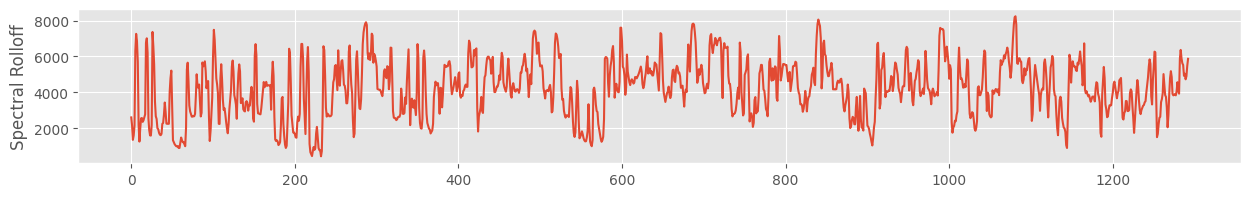

In [35]:
spectral_rolloff = librosa.feature.spectral_rolloff(y=y+0.01, sr=sr, roll_percent=0.85)[0]
plt.figure(figsize=(15, 2))
plt.plot(spectral_rolloff)
plt.ylabel('Spectral Rolloff')
print('Spectral Rolloff mean = {:.2f}'.format(np.mean(spectral_rolloff)))
print('Spectral Rolloff std dev = {:.2f}'.format(np.std(spectral_rolloff)))

# What would be a good roll_percent to use?

5) Mel-Frequency Cepstral Coefficients

Means [-175.5785     104.87788    -15.688772    27.520798    -8.110774
   24.028858   -10.31288     18.851536    -8.380903    11.850703
   -7.579116    12.5616455   -6.039826     2.497356     1.9000845
    7.1328044   -3.3741229   12.43828     -3.3470025    0.7457136]
Std devs [83.97323   29.598791  23.63881   19.392406  15.6146755 14.111802
 16.018469  13.673657  13.576222  12.615814  11.6101    11.233123
  9.76644   10.771538   9.206677   9.174093   9.322932   9.667318
  8.418666   9.460812 ]


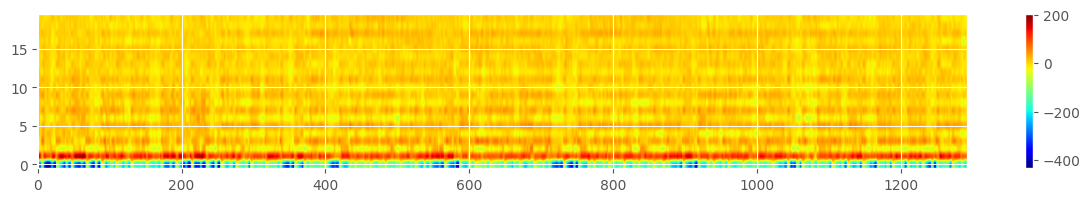

In [36]:
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)
plt.figure(figsize=(15, 2))
plt.imshow(mfccs, aspect='auto', origin='lower', cmap='jet')
plt.colorbar()
print('Means', np.mean(mfccs, axis=1))
print('Std devs', np.std(mfccs, axis=1))

6) Chroma Features (STFT)
A chroma vector (Wikipedia) is a typically a 12-element feature vector indicating how much energy of each pitch class, {C, C#, D, D#, E, ..., B}, is present in the signal.

Means [0.35506114 0.48785305 0.3332035  0.29088643 0.40694574 0.3671467
 0.4168597  0.3811132  0.4893985  0.5623202  0.3924063  0.3471099 ]
Std devs [0.25906405 0.3436864  0.2895219  0.24984482 0.2992863  0.28325003
 0.32103318 0.282773   0.3097678  0.34972438 0.27478564 0.2776367 ]


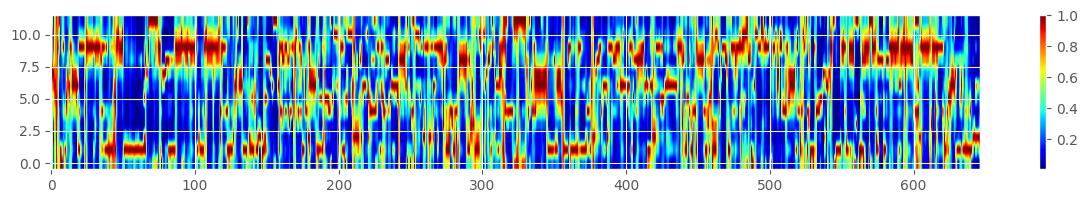

In [37]:
chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr, hop_length=1024)
plt.figure(figsize=(15,2))
plt.imshow(chroma_stft, aspect='auto', origin='lower', cmap='jet')
plt.colorbar()
print('Means', np.mean(chroma_stft, axis=1)) 
print('Std devs', np.std(chroma_stft, axis=1)) 

7) Chroma Features (CQT)

Means [0.45849198 0.6055987  0.568021   0.50700736 0.58650094 0.57610404
 0.6685878  0.56103677 0.601428   0.69902587 0.487176   0.45160437]
Std devs [0.16701205 0.23840362 0.24347115 0.17892644 0.19713035 0.1994511
 0.23897724 0.19799961 0.2222447  0.262341   0.1698912  0.20372364]


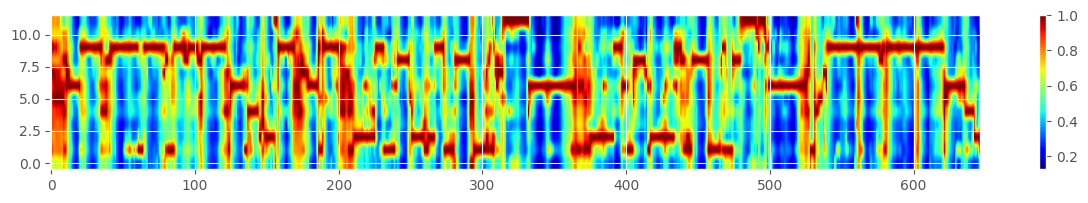

In [38]:
chroma_cqt = librosa.feature.chroma_cqt(y=y, sr=sr, hop_length=1024)
plt.figure(figsize=(15,2))
plt.imshow(chroma_cqt, aspect='auto', origin='lower', cmap='jet')
plt.colorbar()
print('Means', np.mean(chroma_cqt, axis=1)) 
print('Std devs', np.std(chroma_cqt, axis=1)) 

8) Chroma Features (CENS) - Chroma energy normalized statistics

Means [0.23549312 0.30163357 0.28467953 0.25478822 0.27000454 0.2728051
 0.3270569  0.2734479  0.30477425 0.3486772  0.2402499  0.21983646]
Std devs [0.03863098 0.06392316 0.07290864 0.02765337 0.03821784 0.04317318
 0.10249736 0.04563705 0.07393013 0.12791091 0.04452243 0.08150737]


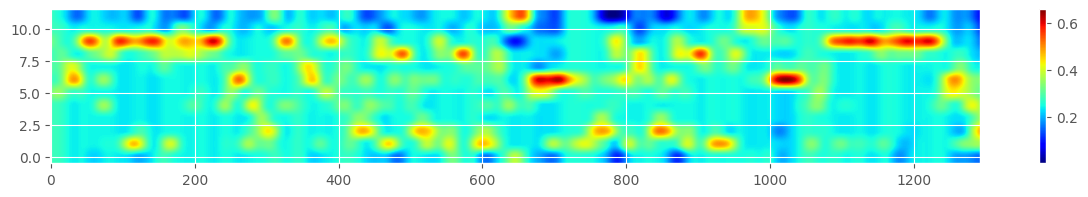

In [39]:
chroma_cens = librosa.feature.chroma_cens(y=y, sr=sr, hop_length=512)
plt.figure(figsize=(15,2))
plt.imshow(chroma_cens, aspect='auto', origin='lower', cmap='jet')
plt.colorbar()
print('Means', np.mean(chroma_cens, axis=1)) 
print('Std devs', np.std(chroma_cens, axis=1)) 

In [40]:
import os
import numpy as np
import pandas as pd
import scipy
import librosa
from tqdm import tqdm

In [41]:
import os

WAV_DIR = '/content/drive/MyDrive/PSV-proiect/data-set/genres_original/'

wav_files = []
for genre_folder in os.listdir(WAV_DIR):
    genre_path = os.path.join(WAV_DIR, genre_folder)
    if os.path.isdir(genre_path):
        genre_files = os.listdir(genre_path)
        wav_files.extend([os.path.join(genre_folder, file) for file in genre_files])

print(wav_files)

['rock/rock.00000.wav', 'rock/rock.00001.wav', 'rock/rock.00003.wav', 'rock/rock.00002.wav', 'rock/rock.00012.wav', 'rock/rock.00007.wav', 'rock/rock.00008.wav', 'rock/rock.00014.wav', 'rock/rock.00013.wav', 'rock/rock.00004.wav', 'rock/rock.00011.wav', 'rock/rock.00005.wav', 'rock/rock.00006.wav', 'rock/rock.00010.wav', 'rock/rock.00016.wav', 'rock/rock.00009.wav', 'rock/rock.00015.wav', 'rock/rock.00024.wav', 'rock/rock.00030.wav', 'rock/rock.00026.wav', 'rock/rock.00025.wav', 'rock/rock.00023.wav', 'rock/rock.00031.wav', 'rock/rock.00027.wav', 'rock/rock.00019.wav', 'rock/rock.00018.wav', 'rock/rock.00022.wav', 'rock/rock.00017.wav', 'rock/rock.00028.wav', 'rock/rock.00029.wav', 'rock/rock.00020.wav', 'rock/rock.00021.wav', 'rock/rock.00032.wav', 'rock/rock.00043.wav', 'rock/rock.00040.wav', 'rock/rock.00033.wav', 'rock/rock.00041.wav', 'rock/rock.00036.wav', 'rock/rock.00038.wav', 'rock/rock.00044.wav', 'rock/rock.00034.wav', 'rock/rock.00037.wav', 'rock/rock.00039.wav', 'rock/rock

In [42]:
col_names = ['file_name', 'signal_mean', 'signal_std', 'signal_skew', 'signal_kurtosis', 
             'zcr_mean', 'zcr_std', 'rmse_mean', 'rmse_std', 'tempo',
             'spectral_centroid_mean', 'spectral_centroid_std',
             'spectral_bandwidth_2_mean', 'spectral_bandwidth_2_std',
             'spectral_bandwidth_3_mean', 'spectral_bandwidth_3_std',
             'spectral_bandwidth_4_mean', 'spectral_bandwidth_4_std'] + \
            ['spectral_contrast_' + str(i+1) + '_mean' for i in range(7)] + \
            ['spectral_contrast_' + str(i+1) + '_std' for i in range(7)] + \
            ['spectral_rolloff_mean', 'spectral_rolloff_std'] + \
            ['mfccs_' + str(i+1) + '_mean' for i in range(20)] + \
            ['mfccs_' + str(i+1) + '_std' for i in range(20)] + \
            ['chroma_stft_' + str(i+1) + '_mean' for i in range(12)] + \
            ['chroma_stft_' + str(i+1) + '_std' for i in range(12)] 
            
df = pd.DataFrame(columns=col_names)

In [43]:
for f in tqdm(wav_files):
    try:
        y, sr = librosa.load(WAV_DIR+f, sr = 22050)
        feature_list = [f]
        feature_list.append(np.mean(abs(y)))
        feature_list.append(np.std(y))
        feature_list.append(scipy.stats.skew(abs(y)))
        feature_list.append(scipy.stats.kurtosis(y))

        zcr = librosa.feature.zero_crossing_rate(y=y + 0.0001, frame_length=2048, hop_length=512)[0]
        feature_list.append(np.mean(zcr))
        feature_list.append(np.std(zcr))

        rms = librosa.feature.rms(y=y)[0]
        feature_list.append(np.mean(rms))
        feature_list.append(np.std(rms))
        
        tempo = librosa.beat.tempo(y=y, sr=sr)
        feature_list.extend(tempo)

        spectral_centroids = librosa.feature.spectral_centroid(y=y+0.01, sr=sr)[0]
        feature_list.append(np.mean(spectral_centroids))
        feature_list.append(np.std(spectral_centroids))

        spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(y=y+0.01, sr=sr, p=2)[0]
        spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(y=y+0.01, sr=sr, p=3)[0]
        spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(y=y+0.01, sr=sr, p=4)[0]
        feature_list.append(np.mean(spectral_bandwidth_2))
        feature_list.append(np.std(spectral_bandwidth_2))
        feature_list.append(np.mean(spectral_bandwidth_3))
        feature_list.append(np.std(spectral_bandwidth_3))
        feature_list.append(np.mean(spectral_bandwidth_3))
        feature_list.append(np.std(spectral_bandwidth_3))

        spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr, n_bands = 6, fmin = 200.0)
        feature_list.extend(np.mean(spectral_contrast, axis=1))
        feature_list.extend(np.std(spectral_contrast, axis=1))

        spectral_rolloff = librosa.feature.spectral_rolloff(y=y+0.01, sr=sr, roll_percent = 0.85)[0]
        feature_list.append(np.mean(spectral_rolloff))
        feature_list.append(np.std(spectral_rolloff))

        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)
        feature_list.extend(np.mean(mfccs, axis=1))
        feature_list.extend(np.std(mfccs, axis=1))
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr, hop_length=1024)
        feature_list.extend(np.mean(chroma_stft, axis=1))
        feature_list.extend(np.std(chroma_stft, axis=1))
        feature_list[1:] = np.round(feature_list[1:], decimals=3)
        print("Length of feature_list:", len(feature_list))
        print("Expected length based on col_names:", len(col_names))
        # Append feature_list to df
        df = pd.concat([df, pd.DataFrame(feature_list, index=col_names).transpose()], ignore_index=True)
        print("Processed file:", f)  # Print the file name for debugging
    except Exception as e:
        print("Error processing file:", f)
        print("Error message:", str(e))
        pass
# Save file
df.to_csv('/content/drive/MyDrive/PSV-proiect/df_features1.csv', index=False)

  0%|          | 0/1000 [00:00<?, ?it/s]<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
  0%|          | 1/1000 [00:01<17:11,  1.03s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: rock/rock.00000.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
  0%|          | 2/1000 [00:02<17:45,  1.07s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: rock/rock.00001.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
  0%|          | 3/1000 [00:03<17:28,  1.05s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: rock/rock.00003.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
  0%|          | 4/1000 [00:04<17:30,  1.05s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: rock/rock.00002.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
  0%|          | 5/1000 [00:05<17:33,  1.06s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: rock/rock.00012.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
  1%|          | 6/1000 [00:06<17:32,  1.06s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: rock/rock.00007.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
  1%|          | 7/1000 [00:07<17:23,  1.05s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: rock/rock.00008.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
  1%|          | 8/1000 [00:08<19:47,  1.20s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: rock/rock.00014.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
  1%|          | 9/1000 [00:10<21:58,  1.33s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: rock/rock.00013.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
  1%|          | 10/1000 [00:11<21:36,  1.31s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: rock/rock.00004.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
  1%|          | 11/1000 [00:12<20:10,  1.22s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: rock/rock.00011.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
  1%|          | 12/1000 [00:13<19:11,  1.17s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: rock/rock.00005.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
  1%|▏         | 13/1000 [00:14<18:33,  1.13s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: rock/rock.00006.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
  1%|▏         | 14/1000 [00:15<18:00,  1.10s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: rock/rock.00010.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
  2%|▏         | 15/1000 [00:16<17:42,  1.08s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: rock/rock.00016.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
  2%|▏         | 16/1000 [00:17<17:29,  1.07s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: rock/rock.00009.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
  2%|▏         | 17/1000 [00:19<17:16,  1.05s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: rock/rock.00015.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
  2%|▏         | 18/1000 [00:20<17:11,  1.05s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: rock/rock.00024.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
  2%|▏         | 19/1000 [00:21<17:05,  1.05s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: rock/rock.00030.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
  2%|▏         | 20/1000 [00:22<19:51,  1.22s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: rock/rock.00026.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
  2%|▏         | 21/1000 [00:24<22:11,  1.36s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: rock/rock.00025.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
  2%|▏         | 22/1000 [00:25<20:38,  1.27s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: rock/rock.00023.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
  2%|▏         | 23/1000 [00:26<19:32,  1.20s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: rock/rock.00031.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
  2%|▏         | 24/1000 [00:27<18:44,  1.15s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: rock/rock.00027.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
  2%|▎         | 25/1000 [00:28<18:11,  1.12s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: rock/rock.00019.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
  3%|▎         | 26/1000 [00:29<17:47,  1.10s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: rock/rock.00018.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
  3%|▎         | 27/1000 [00:30<17:29,  1.08s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: rock/rock.00022.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
  3%|▎         | 28/1000 [00:31<17:16,  1.07s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: rock/rock.00017.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
  3%|▎         | 29/1000 [00:32<17:07,  1.06s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: rock/rock.00028.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
  3%|▎         | 30/1000 [00:33<16:58,  1.05s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: rock/rock.00029.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
  3%|▎         | 31/1000 [00:34<17:46,  1.10s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: rock/rock.00020.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
  3%|▎         | 32/1000 [00:36<20:30,  1.27s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: rock/rock.00021.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
  3%|▎         | 33/1000 [00:38<21:34,  1.34s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: rock/rock.00032.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
  3%|▎         | 34/1000 [00:39<20:07,  1.25s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: rock/rock.00043.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
  4%|▎         | 35/1000 [00:40<19:05,  1.19s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: rock/rock.00040.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
  4%|▎         | 36/1000 [00:41<18:18,  1.14s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: rock/rock.00033.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
  4%|▎         | 37/1000 [00:42<17:49,  1.11s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: rock/rock.00041.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
  4%|▍         | 38/1000 [00:43<17:34,  1.10s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: rock/rock.00036.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
  4%|▍         | 39/1000 [00:44<17:19,  1.08s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: rock/rock.00038.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
  4%|▍         | 40/1000 [00:45<17:08,  1.07s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: rock/rock.00044.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
  4%|▍         | 41/1000 [00:46<16:58,  1.06s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: rock/rock.00034.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
  4%|▍         | 42/1000 [00:47<16:51,  1.06s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: rock/rock.00037.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
  4%|▍         | 43/1000 [00:48<18:20,  1.15s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: rock/rock.00039.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
  4%|▍         | 44/1000 [00:50<20:48,  1.31s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: rock/rock.00035.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
  4%|▍         | 45/1000 [00:51<20:44,  1.30s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: rock/rock.00042.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
  5%|▍         | 46/1000 [00:52<19:23,  1.22s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: rock/rock.00045.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
  5%|▍         | 47/1000 [00:53<18:29,  1.16s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: rock/rock.00052.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
  5%|▍         | 48/1000 [00:54<17:49,  1.12s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: rock/rock.00046.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
  5%|▍         | 49/1000 [00:55<17:23,  1.10s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: rock/rock.00054.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
  5%|▌         | 50/1000 [00:57<17:05,  1.08s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: rock/rock.00048.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
  5%|▌         | 51/1000 [00:58<16:50,  1.06s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: rock/rock.00055.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
  5%|▌         | 52/1000 [00:59<16:39,  1.05s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: rock/rock.00051.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
  5%|▌         | 53/1000 [01:00<16:33,  1.05s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: rock/rock.00057.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
  5%|▌         | 54/1000 [01:01<16:26,  1.04s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: rock/rock.00058.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
  6%|▌         | 55/1000 [01:02<19:11,  1.22s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: rock/rock.00047.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
  6%|▌         | 56/1000 [01:04<20:42,  1.32s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: rock/rock.00050.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
  6%|▌         | 57/1000 [01:05<19:55,  1.27s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: rock/rock.00053.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
  6%|▌         | 58/1000 [01:06<18:51,  1.20s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: rock/rock.00056.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
  6%|▌         | 59/1000 [01:07<18:02,  1.15s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: rock/rock.00049.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
  6%|▌         | 60/1000 [01:08<17:32,  1.12s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: rock/rock.00069.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
  6%|▌         | 61/1000 [01:09<17:09,  1.10s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: rock/rock.00071.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
  6%|▌         | 62/1000 [01:10<16:52,  1.08s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: rock/rock.00070.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
  6%|▋         | 63/1000 [01:11<16:39,  1.07s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: rock/rock.00066.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
  6%|▋         | 64/1000 [01:12<16:27,  1.05s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: rock/rock.00063.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
  6%|▋         | 65/1000 [01:13<16:19,  1.05s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: rock/rock.00061.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
  7%|▋         | 66/1000 [01:14<16:24,  1.05s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: rock/rock.00068.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
  7%|▋         | 67/1000 [01:16<19:13,  1.24s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: rock/rock.00059.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
  7%|▋         | 68/1000 [01:18<20:44,  1.33s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: rock/rock.00064.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
  7%|▋         | 69/1000 [01:19<19:19,  1.25s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: rock/rock.00067.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
  7%|▋         | 70/1000 [01:20<18:19,  1.18s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: rock/rock.00065.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
  7%|▋         | 71/1000 [01:21<17:38,  1.14s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: rock/rock.00060.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
  7%|▋         | 72/1000 [01:22<17:07,  1.11s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: rock/rock.00062.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
  7%|▋         | 73/1000 [01:23<16:45,  1.09s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: rock/rock.00083.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
  7%|▋         | 74/1000 [01:24<16:30,  1.07s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: rock/rock.00080.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
  8%|▊         | 75/1000 [01:25<16:19,  1.06s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: rock/rock.00082.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
  8%|▊         | 76/1000 [01:26<16:08,  1.05s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: rock/rock.00085.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
  8%|▊         | 77/1000 [01:27<15:59,  1.04s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: rock/rock.00072.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
  8%|▊         | 78/1000 [01:28<16:46,  1.09s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: rock/rock.00077.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
  8%|▊         | 79/1000 [01:30<19:03,  1.24s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: rock/rock.00073.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
  8%|▊         | 80/1000 [01:31<20:24,  1.33s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: rock/rock.00084.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
  8%|▊         | 81/1000 [01:32<19:00,  1.24s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: rock/rock.00081.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
  8%|▊         | 82/1000 [01:33<18:00,  1.18s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: rock/rock.00079.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
  8%|▊         | 83/1000 [01:34<17:21,  1.14s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: rock/rock.00078.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
  8%|▊         | 84/1000 [01:35<16:55,  1.11s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: rock/rock.00075.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
  8%|▊         | 85/1000 [01:36<16:38,  1.09s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: rock/rock.00076.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
  9%|▊         | 86/1000 [01:37<16:20,  1.07s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: rock/rock.00074.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
  9%|▊         | 87/1000 [01:38<16:11,  1.06s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: rock/rock.00092.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
  9%|▉         | 88/1000 [01:40<16:02,  1.06s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: rock/rock.00089.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
  9%|▉         | 89/1000 [01:41<15:54,  1.05s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: rock/rock.00094.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
  9%|▉         | 90/1000 [01:42<17:19,  1.14s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: rock/rock.00086.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
  9%|▉         | 91/1000 [01:44<19:42,  1.30s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: rock/rock.00090.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
  9%|▉         | 92/1000 [01:45<19:59,  1.32s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: rock/rock.00096.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
  9%|▉         | 93/1000 [01:46<18:41,  1.24s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: rock/rock.00093.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
  9%|▉         | 94/1000 [01:47<17:45,  1.18s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: rock/rock.00087.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 10%|▉         | 95/1000 [01:48<17:06,  1.13s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: rock/rock.00097.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 10%|▉         | 96/1000 [01:49<16:38,  1.10s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: rock/rock.00091.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 10%|▉         | 97/1000 [01:50<16:19,  1.08s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: rock/rock.00088.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 10%|▉         | 98/1000 [01:51<16:05,  1.07s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: rock/rock.00095.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 10%|▉         | 99/1000 [01:52<15:49,  1.05s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: rock/rock.00098.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 10%|█         | 100/1000 [01:53<15:41,  1.05s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: rock/rock.00099.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 10%|█         | 101/1000 [01:54<16:34,  1.11s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: reggae/reggae.00000.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 10%|█         | 102/1000 [01:56<19:52,  1.33s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: reggae/reggae.00009.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 10%|█         | 103/1000 [01:58<21:18,  1.43s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: reggae/reggae.00010.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 10%|█         | 104/1000 [01:59<20:39,  1.38s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: reggae/reggae.00001.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 10%|█         | 105/1000 [02:01<20:40,  1.39s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: reggae/reggae.00008.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 11%|█         | 106/1000 [02:02<20:07,  1.35s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: reggae/reggae.00011.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 11%|█         | 107/1000 [02:03<19:44,  1.33s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: reggae/reggae.00002.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 11%|█         | 108/1000 [02:04<19:28,  1.31s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: reggae/reggae.00007.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 11%|█         | 109/1000 [02:05<18:11,  1.23s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: reggae/reggae.00004.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 11%|█         | 110/1000 [02:07<18:47,  1.27s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: reggae/reggae.00006.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 11%|█         | 111/1000 [02:08<19:45,  1.33s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: reggae/reggae.00005.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 11%|█         | 112/1000 [02:10<23:13,  1.57s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: reggae/reggae.00003.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 11%|█▏        | 113/1000 [02:12<22:00,  1.49s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: reggae/reggae.00016.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 11%|█▏        | 114/1000 [02:13<20:55,  1.42s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: reggae/reggae.00017.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 12%|█▏        | 115/1000 [02:14<20:16,  1.37s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: reggae/reggae.00023.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 12%|█▏        | 116/1000 [02:15<19:33,  1.33s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: reggae/reggae.00014.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 12%|█▏        | 117/1000 [02:17<19:12,  1.30s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: reggae/reggae.00015.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 12%|█▏        | 118/1000 [02:18<18:51,  1.28s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: reggae/reggae.00022.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 12%|█▏        | 119/1000 [02:19<18:30,  1.26s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: reggae/reggae.00018.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 12%|█▏        | 120/1000 [02:20<18:21,  1.25s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: reggae/reggae.00019.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 12%|█▏        | 121/1000 [02:22<20:41,  1.41s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: reggae/reggae.00020.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 12%|█▏        | 122/1000 [02:24<22:18,  1.52s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: reggae/reggae.00012.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 12%|█▏        | 123/1000 [02:25<21:04,  1.44s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: reggae/reggae.00013.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 12%|█▏        | 124/1000 [02:26<20:07,  1.38s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: reggae/reggae.00021.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 12%|█▎        | 125/1000 [02:28<19:27,  1.33s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: reggae/reggae.00026.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 13%|█▎        | 126/1000 [02:29<19:03,  1.31s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: reggae/reggae.00024.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 13%|█▎        | 127/1000 [02:30<18:50,  1.29s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: reggae/reggae.00033.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 13%|█▎        | 128/1000 [02:31<18:43,  1.29s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: reggae/reggae.00030.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 13%|█▎        | 129/1000 [02:33<18:48,  1.30s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: reggae/reggae.00025.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 13%|█▎        | 130/1000 [02:34<18:42,  1.29s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: reggae/reggae.00034.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 13%|█▎        | 131/1000 [02:36<21:08,  1.46s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: reggae/reggae.00027.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 13%|█▎        | 132/1000 [02:38<21:53,  1.51s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: reggae/reggae.00032.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 13%|█▎        | 133/1000 [02:39<20:38,  1.43s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: reggae/reggae.00029.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 13%|█▎        | 134/1000 [02:40<19:56,  1.38s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: reggae/reggae.00028.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 14%|█▎        | 135/1000 [02:41<19:14,  1.33s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: reggae/reggae.00035.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 14%|█▎        | 136/1000 [02:43<18:54,  1.31s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: reggae/reggae.00031.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 14%|█▎        | 137/1000 [02:44<18:36,  1.29s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: reggae/reggae.00040.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 14%|█▍        | 138/1000 [02:45<18:22,  1.28s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: reggae/reggae.00046.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 14%|█▍        | 139/1000 [02:46<18:16,  1.27s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: reggae/reggae.00041.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 14%|█▍        | 140/1000 [02:48<19:29,  1.36s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: reggae/reggae.00043.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 14%|█▍        | 141/1000 [02:50<21:27,  1.50s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: reggae/reggae.00048.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 14%|█▍        | 142/1000 [02:51<21:03,  1.47s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: reggae/reggae.00036.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 14%|█▍        | 143/1000 [02:52<19:57,  1.40s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: reggae/reggae.00049.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 14%|█▍        | 144/1000 [02:54<19:18,  1.35s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: reggae/reggae.00047.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 14%|█▍        | 145/1000 [02:55<18:44,  1.32s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: reggae/reggae.00038.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 15%|█▍        | 146/1000 [02:56<18:18,  1.29s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: reggae/reggae.00037.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 15%|█▍        | 147/1000 [02:57<18:15,  1.28s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: reggae/reggae.00044.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 15%|█▍        | 148/1000 [02:59<18:01,  1.27s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: reggae/reggae.00042.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 15%|█▍        | 149/1000 [03:00<17:55,  1.26s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: reggae/reggae.00039.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 15%|█▌        | 150/1000 [03:01<18:55,  1.34s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: reggae/reggae.00045.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 15%|█▌        | 151/1000 [03:03<21:04,  1.49s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: reggae/reggae.00059.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 15%|█▌        | 152/1000 [03:04<20:28,  1.45s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: reggae/reggae.00055.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 15%|█▌        | 153/1000 [03:06<19:34,  1.39s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: reggae/reggae.00057.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 15%|█▌        | 154/1000 [03:07<19:01,  1.35s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: reggae/reggae.00053.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 16%|█▌        | 155/1000 [03:08<18:25,  1.31s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: reggae/reggae.00056.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 16%|█▌        | 156/1000 [03:09<18:10,  1.29s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: reggae/reggae.00058.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 16%|█▌        | 157/1000 [03:11<18:13,  1.30s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: reggae/reggae.00052.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 16%|█▌        | 158/1000 [03:12<18:06,  1.29s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: reggae/reggae.00054.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 16%|█▌        | 159/1000 [03:13<17:44,  1.27s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: reggae/reggae.00050.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 16%|█▌        | 160/1000 [03:15<20:14,  1.45s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: reggae/reggae.00060.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 16%|█▌        | 161/1000 [03:17<21:33,  1.54s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: reggae/reggae.00061.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 16%|█▌        | 162/1000 [03:18<20:33,  1.47s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: reggae/reggae.00051.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 16%|█▋        | 163/1000 [03:19<19:35,  1.40s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: reggae/reggae.00064.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 16%|█▋        | 164/1000 [03:21<19:35,  1.41s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: reggae/reggae.00067.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 16%|█▋        | 165/1000 [03:22<18:57,  1.36s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: reggae/reggae.00073.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 17%|█▋        | 166/1000 [03:23<18:36,  1.34s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: reggae/reggae.00072.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 17%|█▋        | 167/1000 [03:25<18:09,  1.31s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: reggae/reggae.00069.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 17%|█▋        | 168/1000 [03:26<18:21,  1.32s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: reggae/reggae.00062.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 17%|█▋        | 169/1000 [03:27<18:49,  1.36s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: reggae/reggae.00065.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 17%|█▋        | 170/1000 [03:29<21:01,  1.52s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: reggae/reggae.00066.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 17%|█▋        | 171/1000 [03:31<20:18,  1.47s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: reggae/reggae.00070.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 17%|█▋        | 172/1000 [03:32<19:19,  1.40s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: reggae/reggae.00074.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 17%|█▋        | 173/1000 [03:33<18:54,  1.37s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: reggae/reggae.00063.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 17%|█▋        | 174/1000 [03:35<18:46,  1.36s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: reggae/reggae.00068.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 18%|█▊        | 175/1000 [03:36<18:22,  1.34s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: reggae/reggae.00071.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 18%|█▊        | 176/1000 [03:37<17:51,  1.30s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: reggae/reggae.00083.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 18%|█▊        | 177/1000 [03:38<17:40,  1.29s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: reggae/reggae.00080.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 18%|█▊        | 178/1000 [03:40<17:38,  1.29s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: reggae/reggae.00086.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 18%|█▊        | 179/1000 [03:41<19:03,  1.39s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: reggae/reggae.00087.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 18%|█▊        | 180/1000 [03:43<20:40,  1.51s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: reggae/reggae.00085.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 18%|█▊        | 181/1000 [03:44<19:51,  1.45s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: reggae/reggae.00078.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 18%|█▊        | 182/1000 [03:46<19:05,  1.40s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: reggae/reggae.00088.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 18%|█▊        | 183/1000 [03:47<18:40,  1.37s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: reggae/reggae.00082.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 18%|█▊        | 184/1000 [03:48<18:07,  1.33s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: reggae/reggae.00075.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 18%|█▊        | 185/1000 [03:49<17:39,  1.30s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: reggae/reggae.00076.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 19%|█▊        | 186/1000 [03:51<17:35,  1.30s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: reggae/reggae.00077.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 19%|█▊        | 187/1000 [03:52<17:01,  1.26s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: reggae/reggae.00081.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 19%|█▉        | 188/1000 [03:53<17:05,  1.26s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: reggae/reggae.00079.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 19%|█▉        | 189/1000 [03:55<19:07,  1.42s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: reggae/reggae.00084.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 19%|█▉        | 190/1000 [03:57<20:33,  1.52s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: reggae/reggae.00090.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 19%|█▉        | 191/1000 [03:58<19:18,  1.43s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: reggae/reggae.00093.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 19%|█▉        | 192/1000 [03:59<18:21,  1.36s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: reggae/reggae.00092.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 19%|█▉        | 193/1000 [04:00<17:46,  1.32s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: reggae/reggae.00097.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 19%|█▉        | 194/1000 [04:01<17:08,  1.28s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: reggae/reggae.00099.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 20%|█▉        | 195/1000 [04:03<16:59,  1.27s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: reggae/reggae.00098.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 20%|█▉        | 196/1000 [04:04<16:57,  1.27s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: reggae/reggae.00094.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 20%|█▉        | 197/1000 [04:05<16:52,  1.26s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: reggae/reggae.00091.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 20%|█▉        | 198/1000 [04:06<16:41,  1.25s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: reggae/reggae.00095.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 20%|█▉        | 199/1000 [04:08<19:06,  1.43s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: reggae/reggae.00096.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 20%|██        | 200/1000 [04:10<20:05,  1.51s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: reggae/reggae.00089.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 20%|██        | 201/1000 [04:11<18:49,  1.41s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: pop/pop.00008.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 20%|██        | 202/1000 [04:12<18:16,  1.37s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: pop/pop.00002.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 20%|██        | 203/1000 [04:14<17:45,  1.34s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: pop/pop.00003.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 20%|██        | 204/1000 [04:15<17:30,  1.32s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: pop/pop.00004.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 20%|██        | 205/1000 [04:16<17:06,  1.29s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: pop/pop.00005.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 21%|██        | 206/1000 [04:17<16:48,  1.27s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: pop/pop.00001.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 21%|██        | 207/1000 [04:19<16:37,  1.26s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: pop/pop.00000.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 21%|██        | 208/1000 [04:20<17:17,  1.31s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: pop/pop.00009.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 21%|██        | 209/1000 [04:22<19:13,  1.46s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: pop/pop.00007.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 21%|██        | 210/1000 [04:23<19:21,  1.47s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: pop/pop.00006.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 21%|██        | 211/1000 [04:25<18:21,  1.40s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: pop/pop.00013.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 21%|██        | 212/1000 [04:26<17:43,  1.35s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: pop/pop.00012.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 21%|██▏       | 213/1000 [04:27<17:23,  1.33s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: pop/pop.00017.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 21%|██▏       | 214/1000 [04:28<17:14,  1.32s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: pop/pop.00019.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 22%|██▏       | 215/1000 [04:30<16:55,  1.29s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: pop/pop.00020.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 22%|██▏       | 216/1000 [04:31<16:47,  1.28s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: pop/pop.00010.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 22%|██▏       | 217/1000 [04:32<16:41,  1.28s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: pop/pop.00011.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 22%|██▏       | 218/1000 [04:34<18:08,  1.39s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: pop/pop.00016.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 22%|██▏       | 219/1000 [04:36<19:39,  1.51s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: pop/pop.00018.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 22%|██▏       | 220/1000 [04:37<18:48,  1.45s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: pop/pop.00014.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 22%|██▏       | 221/1000 [04:38<18:10,  1.40s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: pop/pop.00022.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 22%|██▏       | 222/1000 [04:40<17:36,  1.36s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: pop/pop.00021.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 22%|██▏       | 223/1000 [04:41<17:32,  1.35s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: pop/pop.00015.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 22%|██▏       | 224/1000 [04:42<17:05,  1.32s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: pop/pop.00026.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 22%|██▎       | 225/1000 [04:43<16:50,  1.30s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: pop/pop.00028.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 23%|██▎       | 226/1000 [04:45<16:54,  1.31s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: pop/pop.00035.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 23%|██▎       | 227/1000 [04:46<16:43,  1.30s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: pop/pop.00027.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 23%|██▎       | 228/1000 [04:48<18:51,  1.47s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: pop/pop.00030.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 23%|██▎       | 229/1000 [04:49<19:30,  1.52s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: pop/pop.00031.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 23%|██▎       | 230/1000 [04:51<18:27,  1.44s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: pop/pop.00037.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 23%|██▎       | 231/1000 [04:52<17:43,  1.38s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: pop/pop.00036.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 23%|██▎       | 232/1000 [04:53<17:04,  1.33s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: pop/pop.00034.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 23%|██▎       | 233/1000 [04:54<16:44,  1.31s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: pop/pop.00032.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 23%|██▎       | 234/1000 [04:56<16:32,  1.30s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: pop/pop.00024.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 24%|██▎       | 235/1000 [04:57<16:31,  1.30s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: pop/pop.00025.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 24%|██▎       | 236/1000 [04:58<16:31,  1.30s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: pop/pop.00023.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 24%|██▎       | 237/1000 [05:00<16:46,  1.32s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: pop/pop.00029.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 24%|██▍       | 238/1000 [05:01<18:37,  1.47s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: pop/pop.00033.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 24%|██▍       | 239/1000 [05:03<18:57,  1.49s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: pop/pop.00049.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 24%|██▍       | 240/1000 [05:04<17:58,  1.42s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: pop/pop.00045.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 24%|██▍       | 241/1000 [05:06<17:24,  1.38s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: pop/pop.00040.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 24%|██▍       | 242/1000 [05:07<17:08,  1.36s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: pop/pop.00042.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 24%|██▍       | 243/1000 [05:08<16:39,  1.32s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: pop/pop.00047.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 24%|██▍       | 244/1000 [05:09<16:14,  1.29s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: pop/pop.00046.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 24%|██▍       | 245/1000 [05:11<16:01,  1.27s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: pop/pop.00041.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 25%|██▍       | 246/1000 [05:12<15:47,  1.26s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: pop/pop.00051.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 25%|██▍       | 247/1000 [05:13<16:45,  1.34s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: pop/pop.00048.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 25%|██▍       | 248/1000 [05:15<18:46,  1.50s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: pop/pop.00043.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 25%|██▍       | 249/1000 [05:16<18:04,  1.44s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: pop/pop.00039.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 25%|██▌       | 250/1000 [05:18<17:09,  1.37s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: pop/pop.00044.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 25%|██▌       | 251/1000 [05:19<16:44,  1.34s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: pop/pop.00038.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 25%|██▌       | 252/1000 [05:20<16:30,  1.32s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: pop/pop.00050.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 25%|██▌       | 253/1000 [05:22<16:16,  1.31s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: pop/pop.00052.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 25%|██▌       | 254/1000 [05:23<16:02,  1.29s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: pop/pop.00063.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 26%|██▌       | 255/1000 [05:24<15:54,  1.28s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: pop/pop.00055.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 26%|██▌       | 256/1000 [05:25<15:40,  1.26s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: pop/pop.00061.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 26%|██▌       | 257/1000 [05:27<17:11,  1.39s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: pop/pop.00057.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 26%|██▌       | 258/1000 [05:29<18:52,  1.53s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: pop/pop.00058.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 26%|██▌       | 259/1000 [05:30<17:45,  1.44s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: pop/pop.00062.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 26%|██▌       | 260/1000 [05:31<16:52,  1.37s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: pop/pop.00060.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 26%|██▌       | 261/1000 [05:32<16:22,  1.33s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: pop/pop.00053.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 26%|██▌       | 262/1000 [05:34<16:02,  1.30s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: pop/pop.00056.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 26%|██▋       | 263/1000 [05:35<15:32,  1.26s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: pop/pop.00054.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 26%|██▋       | 264/1000 [05:36<15:30,  1.26s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: pop/pop.00059.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 26%|██▋       | 265/1000 [05:37<15:36,  1.27s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: pop/pop.00064.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 27%|██▋       | 266/1000 [05:39<15:34,  1.27s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: pop/pop.00070.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 27%|██▋       | 267/1000 [05:40<17:19,  1.42s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: pop/pop.00074.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 27%|██▋       | 268/1000 [05:42<18:45,  1.54s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: pop/pop.00075.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 27%|██▋       | 269/1000 [05:44<17:36,  1.45s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: pop/pop.00067.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 27%|██▋       | 270/1000 [05:45<16:59,  1.40s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: pop/pop.00072.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 27%|██▋       | 271/1000 [05:46<16:54,  1.39s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: pop/pop.00065.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 27%|██▋       | 272/1000 [05:47<16:00,  1.32s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: pop/pop.00071.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 27%|██▋       | 273/1000 [05:49<15:44,  1.30s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: pop/pop.00069.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 27%|██▋       | 274/1000 [05:50<15:32,  1.28s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: pop/pop.00073.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 28%|██▊       | 275/1000 [05:51<15:33,  1.29s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: pop/pop.00068.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 28%|██▊       | 276/1000 [05:53<15:58,  1.32s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: pop/pop.00066.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 28%|██▊       | 277/1000 [05:54<17:44,  1.47s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: pop/pop.00080.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 28%|██▊       | 278/1000 [05:56<18:03,  1.50s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: pop/pop.00083.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 28%|██▊       | 279/1000 [05:57<17:00,  1.42s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: pop/pop.00082.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 28%|██▊       | 280/1000 [05:58<16:40,  1.39s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: pop/pop.00078.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 28%|██▊       | 281/1000 [06:00<15:57,  1.33s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: pop/pop.00085.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 28%|██▊       | 282/1000 [06:01<15:35,  1.30s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: pop/pop.00079.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 28%|██▊       | 283/1000 [06:02<15:27,  1.29s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: pop/pop.00081.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 28%|██▊       | 284/1000 [06:03<15:23,  1.29s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: pop/pop.00077.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 28%|██▊       | 285/1000 [06:05<15:04,  1.26s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: pop/pop.00076.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 29%|██▊       | 286/1000 [06:06<15:34,  1.31s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: pop/pop.00086.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 29%|██▊       | 287/1000 [06:08<17:41,  1.49s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: pop/pop.00084.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 29%|██▉       | 288/1000 [06:09<17:35,  1.48s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: pop/pop.00087.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 29%|██▉       | 289/1000 [06:11<17:35,  1.49s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: pop/pop.00098.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 29%|██▉       | 290/1000 [06:12<16:46,  1.42s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: pop/pop.00099.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 29%|██▉       | 291/1000 [06:13<16:09,  1.37s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: pop/pop.00097.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 29%|██▉       | 292/1000 [06:15<15:47,  1.34s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: pop/pop.00096.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 29%|██▉       | 293/1000 [06:16<15:32,  1.32s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: pop/pop.00090.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 29%|██▉       | 294/1000 [06:17<15:42,  1.34s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: pop/pop.00095.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 30%|██▉       | 295/1000 [06:19<15:24,  1.31s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: pop/pop.00094.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 30%|██▉       | 296/1000 [06:20<17:17,  1.47s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: pop/pop.00092.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 30%|██▉       | 297/1000 [06:22<18:06,  1.54s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: pop/pop.00093.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 30%|██▉       | 298/1000 [06:23<17:14,  1.47s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: pop/pop.00088.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 30%|██▉       | 299/1000 [06:25<16:21,  1.40s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: pop/pop.00089.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 30%|███       | 300/1000 [06:26<15:46,  1.35s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: pop/pop.00091.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 30%|███       | 301/1000 [06:27<15:25,  1.32s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: metal/metal.00000.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 30%|███       | 302/1000 [06:28<15:02,  1.29s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: metal/metal.00007.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 30%|███       | 303/1000 [06:30<15:00,  1.29s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: metal/metal.00001.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 30%|███       | 304/1000 [06:31<15:03,  1.30s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: metal/metal.00011.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 30%|███       | 305/1000 [06:32<15:18,  1.32s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: metal/metal.00002.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 31%|███       | 306/1000 [06:34<16:47,  1.45s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: metal/metal.00010.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 31%|███       | 307/1000 [06:36<17:12,  1.49s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: metal/metal.00005.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 31%|███       | 308/1000 [06:37<16:24,  1.42s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: metal/metal.00006.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 31%|███       | 309/1000 [06:38<16:06,  1.40s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: metal/metal.00009.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 31%|███       | 310/1000 [06:40<15:37,  1.36s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: metal/metal.00003.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 31%|███       | 311/1000 [06:41<15:23,  1.34s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: metal/metal.00008.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 31%|███       | 312/1000 [06:42<14:59,  1.31s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: metal/metal.00012.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 31%|███▏      | 313/1000 [06:43<14:41,  1.28s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: metal/metal.00004.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 31%|███▏      | 314/1000 [06:45<14:26,  1.26s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: metal/metal.00020.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 32%|███▏      | 315/1000 [06:46<15:11,  1.33s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: metal/metal.00016.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 32%|███▏      | 316/1000 [06:48<17:01,  1.49s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: metal/metal.00023.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 32%|███▏      | 317/1000 [06:49<16:31,  1.45s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: metal/metal.00026.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 32%|███▏      | 318/1000 [06:51<15:45,  1.39s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: metal/metal.00014.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 32%|███▏      | 319/1000 [06:52<15:11,  1.34s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: metal/metal.00021.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 32%|███▏      | 320/1000 [06:53<14:50,  1.31s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: metal/metal.00015.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 32%|███▏      | 321/1000 [06:54<14:28,  1.28s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: metal/metal.00013.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 32%|███▏      | 322/1000 [06:55<14:17,  1.26s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: metal/metal.00017.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 32%|███▏      | 323/1000 [06:57<14:11,  1.26s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: metal/metal.00019.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 32%|███▏      | 324/1000 [06:58<14:08,  1.25s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: metal/metal.00024.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 32%|███▎      | 325/1000 [07:00<15:37,  1.39s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: metal/metal.00022.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 33%|███▎      | 326/1000 [07:01<17:12,  1.53s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: metal/metal.00027.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 33%|███▎      | 327/1000 [07:03<16:26,  1.47s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: metal/metal.00025.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 33%|███▎      | 328/1000 [07:04<15:45,  1.41s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: metal/metal.00018.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 33%|███▎      | 329/1000 [07:05<15:05,  1.35s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: metal/metal.00039.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 33%|███▎      | 330/1000 [07:07<14:41,  1.32s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: metal/metal.00028.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 33%|███▎      | 331/1000 [07:08<14:23,  1.29s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: metal/metal.00036.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 33%|███▎      | 332/1000 [07:09<14:12,  1.28s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: metal/metal.00029.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 33%|███▎      | 333/1000 [07:10<14:06,  1.27s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: metal/metal.00032.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 33%|███▎      | 334/1000 [07:12<14:12,  1.28s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: metal/metal.00037.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 34%|███▎      | 335/1000 [07:13<16:01,  1.45s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: metal/metal.00038.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 34%|███▎      | 336/1000 [07:15<16:58,  1.53s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: metal/metal.00041.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 34%|███▎      | 337/1000 [07:16<15:49,  1.43s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: metal/metal.00033.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 34%|███▍      | 338/1000 [07:18<15:19,  1.39s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: metal/metal.00030.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 34%|███▍      | 339/1000 [07:19<15:02,  1.37s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: metal/metal.00035.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 34%|███▍      | 340/1000 [07:20<14:37,  1.33s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: metal/metal.00034.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 34%|███▍      | 341/1000 [07:21<14:23,  1.31s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: metal/metal.00040.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 34%|███▍      | 342/1000 [07:23<14:03,  1.28s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: metal/metal.00031.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 34%|███▍      | 343/1000 [07:24<13:49,  1.26s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: metal/metal.00050.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 34%|███▍      | 344/1000 [07:25<13:42,  1.25s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: metal/metal.00055.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 34%|███▍      | 345/1000 [07:27<15:27,  1.42s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: metal/metal.00052.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 35%|███▍      | 346/1000 [07:29<16:17,  1.49s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: metal/metal.00047.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 35%|███▍      | 347/1000 [07:30<15:20,  1.41s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: metal/metal.00053.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 35%|███▍      | 348/1000 [07:31<14:55,  1.37s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: metal/metal.00042.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 35%|███▍      | 349/1000 [07:32<14:30,  1.34s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: metal/metal.00043.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 35%|███▌      | 350/1000 [07:34<14:13,  1.31s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: metal/metal.00048.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 35%|███▌      | 351/1000 [07:35<14:05,  1.30s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: metal/metal.00046.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 35%|███▌      | 352/1000 [07:36<13:57,  1.29s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: metal/metal.00049.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 35%|███▌      | 353/1000 [07:37<13:47,  1.28s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: metal/metal.00051.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 35%|███▌      | 354/1000 [07:39<14:15,  1.32s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: metal/metal.00045.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 36%|███▌      | 355/1000 [07:41<15:50,  1.47s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: metal/metal.00054.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 36%|███▌      | 356/1000 [07:42<15:56,  1.48s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: metal/metal.00044.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 36%|███▌      | 357/1000 [07:43<15:03,  1.41s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: metal/metal.00056.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 36%|███▌      | 358/1000 [07:45<14:47,  1.38s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: metal/metal.00059.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 36%|███▌      | 359/1000 [07:46<14:19,  1.34s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: metal/metal.00060.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 36%|███▌      | 360/1000 [07:47<14:03,  1.32s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: metal/metal.00067.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 36%|███▌      | 361/1000 [07:48<13:36,  1.28s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: metal/metal.00063.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 36%|███▌      | 362/1000 [07:50<13:15,  1.25s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: metal/metal.00066.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 36%|███▋      | 363/1000 [07:51<12:54,  1.22s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: metal/metal.00065.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 36%|███▋      | 364/1000 [07:53<15:36,  1.47s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: metal/metal.00068.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 36%|███▋      | 365/1000 [07:55<16:34,  1.57s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: metal/metal.00064.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 37%|███▋      | 366/1000 [07:56<15:31,  1.47s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: metal/metal.00062.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 37%|███▋      | 367/1000 [07:57<14:36,  1.38s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: metal/metal.00057.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 37%|███▋      | 368/1000 [07:58<14:11,  1.35s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: metal/metal.00069.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 37%|███▋      | 369/1000 [07:59<13:39,  1.30s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: metal/metal.00061.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 37%|███▋      | 370/1000 [08:01<13:20,  1.27s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: metal/metal.00058.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 37%|███▋      | 371/1000 [08:02<13:18,  1.27s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: metal/metal.00078.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 37%|███▋      | 372/1000 [08:03<13:14,  1.26s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: metal/metal.00073.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 37%|███▋      | 373/1000 [08:04<13:06,  1.25s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: metal/metal.00070.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 37%|███▋      | 374/1000 [08:06<14:44,  1.41s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: metal/metal.00079.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 38%|███▊      | 375/1000 [08:08<16:04,  1.54s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: metal/metal.00081.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 38%|███▊      | 376/1000 [08:09<15:10,  1.46s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: metal/metal.00082.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 38%|███▊      | 377/1000 [08:11<14:49,  1.43s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: metal/metal.00072.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 38%|███▊      | 378/1000 [08:12<14:11,  1.37s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: metal/metal.00071.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 38%|███▊      | 379/1000 [08:13<13:53,  1.34s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: metal/metal.00075.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 38%|███▊      | 380/1000 [08:14<13:36,  1.32s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: metal/metal.00074.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 38%|███▊      | 381/1000 [08:16<13:37,  1.32s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: metal/metal.00076.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 38%|███▊      | 382/1000 [08:17<13:20,  1.30s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: metal/metal.00080.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 38%|███▊      | 383/1000 [08:18<13:13,  1.29s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: metal/metal.00077.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 38%|███▊      | 384/1000 [08:20<14:54,  1.45s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: metal/metal.00090.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 38%|███▊      | 385/1000 [08:22<15:29,  1.51s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: metal/metal.00087.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 39%|███▊      | 386/1000 [08:23<14:30,  1.42s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: metal/metal.00092.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 39%|███▊      | 387/1000 [08:24<14:02,  1.37s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: metal/metal.00095.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 39%|███▉      | 388/1000 [08:25<13:34,  1.33s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: metal/metal.00085.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 39%|███▉      | 389/1000 [08:27<13:06,  1.29s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: metal/metal.00094.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 39%|███▉      | 390/1000 [08:28<13:03,  1.28s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: metal/metal.00083.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 39%|███▉      | 391/1000 [08:29<13:04,  1.29s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: metal/metal.00084.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 39%|███▉      | 392/1000 [08:30<13:01,  1.28s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: metal/metal.00093.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 39%|███▉      | 393/1000 [08:32<13:28,  1.33s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: metal/metal.00089.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 39%|███▉      | 394/1000 [08:34<15:21,  1.52s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: metal/metal.00091.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 40%|███▉      | 395/1000 [08:35<15:00,  1.49s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: metal/metal.00096.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 40%|███▉      | 396/1000 [08:37<14:17,  1.42s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: metal/metal.00086.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 40%|███▉      | 397/1000 [08:38<13:47,  1.37s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: metal/metal.00088.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 40%|███▉      | 398/1000 [08:39<13:27,  1.34s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: metal/metal.00098.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 40%|███▉      | 399/1000 [08:40<13:21,  1.33s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: metal/metal.00099.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 40%|████      | 400/1000 [08:42<13:03,  1.31s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: metal/metal.00097.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 40%|████      | 401/1000 [08:43<13:12,  1.32s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: jazz/jazz.00005.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 40%|████      | 402/1000 [08:44<12:56,  1.30s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: jazz/jazz.00004.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 40%|████      | 403/1000 [08:46<14:13,  1.43s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: jazz/jazz.00002.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 40%|████      | 404/1000 [08:48<15:10,  1.53s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: jazz/jazz.00006.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 40%|████      | 405/1000 [08:49<14:16,  1.44s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: jazz/jazz.00000.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 41%|████      | 406/1000 [08:50<13:36,  1.37s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: jazz/jazz.00008.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 41%|████      | 407/1000 [08:51<13:14,  1.34s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: jazz/jazz.00003.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 41%|████      | 408/1000 [08:53<13:07,  1.33s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: jazz/jazz.00007.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 41%|████      | 409/1000 [08:54<12:48,  1.30s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: jazz/jazz.00001.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 41%|████      | 410/1000 [08:55<12:35,  1.28s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: jazz/jazz.00017.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 41%|████      | 411/1000 [08:56<12:27,  1.27s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: jazz/jazz.00010.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 41%|████      | 412/1000 [08:58<12:25,  1.27s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: jazz/jazz.00014.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 41%|████▏     | 413/1000 [09:00<14:04,  1.44s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: jazz/jazz.00018.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 41%|████▏     | 414/1000 [09:01<14:56,  1.53s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: jazz/jazz.00015.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 42%|████▏     | 415/1000 [09:03<14:04,  1.44s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: jazz/jazz.00016.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 42%|████▏     | 416/1000 [09:04<13:32,  1.39s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: jazz/jazz.00020.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 42%|████▏     | 417/1000 [09:05<13:11,  1.36s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: jazz/jazz.00019.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 42%|████▏     | 418/1000 [09:06<12:52,  1.33s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: jazz/jazz.00013.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 42%|████▏     | 419/1000 [09:08<12:58,  1.34s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: jazz/jazz.00012.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 42%|████▏     | 420/1000 [09:09<12:48,  1.33s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: jazz/jazz.00011.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 42%|████▏     | 421/1000 [09:10<12:33,  1.30s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: jazz/jazz.00009.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 42%|████▏     | 422/1000 [09:12<12:44,  1.32s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: jazz/jazz.00031.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 42%|████▏     | 423/1000 [09:13<14:17,  1.49s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: jazz/jazz.00030.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 42%|████▏     | 424/1000 [09:15<14:19,  1.49s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: jazz/jazz.00032.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 42%|████▎     | 425/1000 [09:16<13:37,  1.42s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: jazz/jazz.00033.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 43%|████▎     | 426/1000 [09:17<13:00,  1.36s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: jazz/jazz.00023.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 43%|████▎     | 427/1000 [09:19<12:42,  1.33s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: jazz/jazz.00029.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 43%|████▎     | 428/1000 [09:20<12:24,  1.30s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: jazz/jazz.00022.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 43%|████▎     | 429/1000 [09:21<12:07,  1.27s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: jazz/jazz.00028.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 43%|████▎     | 430/1000 [09:22<11:51,  1.25s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: jazz/jazz.00025.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 43%|████▎     | 431/1000 [09:24<11:49,  1.25s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: jazz/jazz.00026.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 43%|████▎     | 432/1000 [09:25<12:36,  1.33s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: jazz/jazz.00024.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 43%|████▎     | 433/1000 [09:27<14:05,  1.49s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: jazz/jazz.00021.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 43%|████▎     | 434/1000 [09:28<13:49,  1.47s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: jazz/jazz.00027.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 44%|████▎     | 435/1000 [09:30<13:09,  1.40s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: jazz/jazz.00045.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 44%|████▎     | 436/1000 [09:31<12:39,  1.35s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: jazz/jazz.00043.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 44%|████▎     | 437/1000 [09:32<12:21,  1.32s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: jazz/jazz.00046.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 44%|████▍     | 438/1000 [09:33<11:59,  1.28s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: jazz/jazz.00041.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 44%|████▍     | 439/1000 [09:35<11:57,  1.28s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: jazz/jazz.00039.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 44%|████▍     | 440/1000 [09:36<11:55,  1.28s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: jazz/jazz.00037.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 44%|████▍     | 441/1000 [09:37<12:04,  1.30s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: jazz/jazz.00044.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 44%|████▍     | 442/1000 [09:39<13:01,  1.40s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: jazz/jazz.00042.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 44%|████▍     | 443/1000 [09:41<14:12,  1.53s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: jazz/jazz.00040.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 44%|████▍     | 444/1000 [09:42<13:35,  1.47s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: jazz/jazz.00034.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 44%|████▍     | 445/1000 [09:43<13:00,  1.41s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: jazz/jazz.00035.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 45%|████▍     | 446/1000 [09:44<12:24,  1.34s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: jazz/jazz.00038.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 45%|████▍     | 447/1000 [09:46<12:05,  1.31s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: jazz/jazz.00036.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 45%|████▍     | 448/1000 [09:47<11:44,  1.28s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: jazz/jazz.00059.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 45%|████▍     | 449/1000 [09:48<11:35,  1.26s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: jazz/jazz.00058.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 45%|████▌     | 450/1000 [09:49<11:33,  1.26s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: jazz/jazz.00057.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 45%|████▌     | 451/1000 [09:51<11:28,  1.25s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: jazz/jazz.00050.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 45%|████▌     | 452/1000 [09:52<13:02,  1.43s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: jazz/jazz.00049.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 45%|████▌     | 453/1000 [09:54<14:02,  1.54s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: jazz/jazz.00053.wav


<ipython-input-43-eb3cc88b55e2>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(WAV_DIR+f, sr = 22050)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
 45%|████▌     | 454/1000 [09:55<11:47,  1.30s/it]

Error processing file: jazz/jazz.00054.wav
Error message: 


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 46%|████▌     | 455/1000 [09:56<11:33,  1.27s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: jazz/jazz.00056.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 46%|████▌     | 456/1000 [09:57<11:27,  1.26s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: jazz/jazz.00052.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 46%|████▌     | 457/1000 [09:59<11:26,  1.26s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: jazz/jazz.00048.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 46%|████▌     | 458/1000 [10:00<11:28,  1.27s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: jazz/jazz.00051.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 46%|████▌     | 459/1000 [10:01<11:17,  1.25s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: jazz/jazz.00055.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 46%|████▌     | 460/1000 [10:02<11:10,  1.24s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: jazz/jazz.00047.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 46%|████▌     | 461/1000 [10:04<11:12,  1.25s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: jazz/jazz.00068.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 46%|████▌     | 462/1000 [10:05<12:35,  1.40s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: jazz/jazz.00071.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 46%|████▋     | 463/1000 [10:07<13:50,  1.55s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: jazz/jazz.00064.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 46%|████▋     | 464/1000 [10:09<13:12,  1.48s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: jazz/jazz.00060.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 46%|████▋     | 465/1000 [10:10<12:34,  1.41s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: jazz/jazz.00062.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 47%|████▋     | 466/1000 [10:11<12:12,  1.37s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: jazz/jazz.00063.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 47%|████▋     | 467/1000 [10:13<12:37,  1.42s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: jazz/jazz.00065.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 47%|████▋     | 468/1000 [10:14<12:06,  1.37s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: jazz/jazz.00067.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 47%|████▋     | 469/1000 [10:15<11:55,  1.35s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: jazz/jazz.00072.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 47%|████▋     | 470/1000 [10:17<11:39,  1.32s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: jazz/jazz.00070.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 47%|████▋     | 471/1000 [10:18<11:45,  1.33s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: jazz/jazz.00073.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 47%|████▋     | 472/1000 [10:20<13:17,  1.51s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: jazz/jazz.00066.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 47%|████▋     | 473/1000 [10:21<13:16,  1.51s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: jazz/jazz.00061.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 47%|████▋     | 474/1000 [10:23<12:34,  1.44s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: jazz/jazz.00069.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 48%|████▊     | 475/1000 [10:24<11:58,  1.37s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: jazz/jazz.00074.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 48%|████▊     | 476/1000 [10:25<11:39,  1.33s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: jazz/jazz.00075.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 48%|████▊     | 477/1000 [10:26<11:16,  1.29s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: jazz/jazz.00080.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 48%|████▊     | 478/1000 [10:27<11:04,  1.27s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: jazz/jazz.00085.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 48%|████▊     | 479/1000 [10:29<10:58,  1.26s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: jazz/jazz.00081.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 48%|████▊     | 480/1000 [10:30<10:55,  1.26s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: jazz/jazz.00076.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 48%|████▊     | 481/1000 [10:31<11:29,  1.33s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: jazz/jazz.00078.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 48%|████▊     | 482/1000 [10:33<12:47,  1.48s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: jazz/jazz.00086.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 48%|████▊     | 483/1000 [10:35<12:31,  1.45s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: jazz/jazz.00084.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 48%|████▊     | 484/1000 [10:36<11:57,  1.39s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: jazz/jazz.00077.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 48%|████▊     | 485/1000 [10:37<11:34,  1.35s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: jazz/jazz.00079.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 49%|████▊     | 486/1000 [10:38<11:28,  1.34s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: jazz/jazz.00083.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 49%|████▊     | 487/1000 [10:40<11:16,  1.32s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: jazz/jazz.00082.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 49%|████▉     | 488/1000 [10:41<11:03,  1.30s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: jazz/jazz.00087.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 49%|████▉     | 489/1000 [10:42<10:48,  1.27s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: jazz/jazz.00096.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 49%|████▉     | 490/1000 [10:44<10:51,  1.28s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: jazz/jazz.00095.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 49%|████▉     | 491/1000 [10:45<11:35,  1.37s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: jazz/jazz.00098.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 49%|████▉     | 492/1000 [10:47<12:45,  1.51s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: jazz/jazz.00088.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 49%|████▉     | 493/1000 [10:48<12:15,  1.45s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: jazz/jazz.00094.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 49%|████▉     | 494/1000 [10:49<11:37,  1.38s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: jazz/jazz.00089.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 50%|████▉     | 495/1000 [10:51<11:21,  1.35s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: jazz/jazz.00092.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 50%|████▉     | 496/1000 [10:52<11:00,  1.31s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: jazz/jazz.00093.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 50%|████▉     | 497/1000 [10:53<10:52,  1.30s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: jazz/jazz.00097.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 50%|████▉     | 498/1000 [10:54<10:47,  1.29s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: jazz/jazz.00091.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 50%|████▉     | 499/1000 [10:56<10:56,  1.31s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: jazz/jazz.00090.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 50%|█████     | 500/1000 [10:57<10:40,  1.28s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: jazz/jazz.00099.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 50%|█████     | 501/1000 [10:59<11:44,  1.41s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: hiphop/hiphop.00000.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 50%|█████     | 502/1000 [11:01<12:40,  1.53s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: hiphop/hiphop.00013.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 50%|█████     | 503/1000 [11:02<11:52,  1.43s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: hiphop/hiphop.00009.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 50%|█████     | 504/1000 [11:03<11:22,  1.38s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: hiphop/hiphop.00001.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 50%|█████     | 505/1000 [11:04<11:06,  1.35s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: hiphop/hiphop.00010.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 51%|█████     | 506/1000 [11:06<10:58,  1.33s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: hiphop/hiphop.00003.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 51%|█████     | 507/1000 [11:07<10:44,  1.31s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: hiphop/hiphop.00002.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 51%|█████     | 508/1000 [11:08<10:29,  1.28s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: hiphop/hiphop.00014.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 51%|█████     | 509/1000 [11:09<10:23,  1.27s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: hiphop/hiphop.00012.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 51%|█████     | 510/1000 [11:11<10:21,  1.27s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: hiphop/hiphop.00011.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 51%|█████     | 511/1000 [11:12<11:44,  1.44s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: hiphop/hiphop.00006.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 51%|█████     | 512/1000 [11:14<12:17,  1.51s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: hiphop/hiphop.00008.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 51%|█████▏    | 513/1000 [11:15<11:34,  1.43s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: hiphop/hiphop.00005.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 51%|█████▏    | 514/1000 [11:17<11:30,  1.42s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: hiphop/hiphop.00004.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 52%|█████▏    | 515/1000 [11:18<10:58,  1.36s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: hiphop/hiphop.00007.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 52%|█████▏    | 516/1000 [11:19<11:04,  1.37s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: hiphop/hiphop.00027.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 52%|█████▏    | 517/1000 [11:21<10:48,  1.34s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: hiphop/hiphop.00024.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 52%|█████▏    | 518/1000 [11:22<10:32,  1.31s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: hiphop/hiphop.00016.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 52%|█████▏    | 519/1000 [11:23<10:13,  1.28s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: hiphop/hiphop.00025.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 52%|█████▏    | 520/1000 [11:25<10:47,  1.35s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: hiphop/hiphop.00017.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 52%|█████▏    | 521/1000 [11:26<12:00,  1.50s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: hiphop/hiphop.00020.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 52%|█████▏    | 522/1000 [11:28<11:31,  1.45s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: hiphop/hiphop.00028.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 52%|█████▏    | 523/1000 [11:29<11:00,  1.38s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: hiphop/hiphop.00026.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 52%|█████▏    | 524/1000 [11:30<10:43,  1.35s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: hiphop/hiphop.00022.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 52%|█████▎    | 525/1000 [11:32<10:28,  1.32s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: hiphop/hiphop.00021.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 53%|█████▎    | 526/1000 [11:33<10:17,  1.30s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: hiphop/hiphop.00015.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 53%|█████▎    | 527/1000 [11:34<10:08,  1.29s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: hiphop/hiphop.00019.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 53%|█████▎    | 528/1000 [11:35<09:56,  1.26s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: hiphop/hiphop.00018.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 53%|█████▎    | 529/1000 [11:36<09:45,  1.24s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: hiphop/hiphop.00023.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 53%|█████▎    | 530/1000 [11:38<11:22,  1.45s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: hiphop/hiphop.00034.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 53%|█████▎    | 531/1000 [11:40<12:18,  1.57s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: hiphop/hiphop.00032.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 53%|█████▎    | 532/1000 [11:41<11:25,  1.46s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: hiphop/hiphop.00038.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 53%|█████▎    | 533/1000 [11:43<11:00,  1.41s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: hiphop/hiphop.00030.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 53%|█████▎    | 534/1000 [11:44<10:31,  1.35s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: hiphop/hiphop.00039.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 54%|█████▎    | 535/1000 [11:45<10:16,  1.33s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: hiphop/hiphop.00037.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 54%|█████▎    | 536/1000 [11:46<10:00,  1.29s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: hiphop/hiphop.00031.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 54%|█████▎    | 537/1000 [11:48<09:50,  1.28s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: hiphop/hiphop.00029.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 54%|█████▍    | 538/1000 [11:49<09:40,  1.26s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: hiphop/hiphop.00033.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 54%|█████▍    | 539/1000 [11:50<09:37,  1.25s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: hiphop/hiphop.00035.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 54%|█████▍    | 540/1000 [11:52<11:14,  1.47s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: hiphop/hiphop.00041.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 54%|█████▍    | 541/1000 [11:54<11:54,  1.56s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: hiphop/hiphop.00040.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 54%|█████▍    | 542/1000 [11:55<11:14,  1.47s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: hiphop/hiphop.00036.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 54%|█████▍    | 543/1000 [11:56<10:42,  1.41s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: hiphop/hiphop.00050.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 54%|█████▍    | 544/1000 [11:58<10:22,  1.37s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: hiphop/hiphop.00049.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 55%|█████▍    | 545/1000 [11:59<10:08,  1.34s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: hiphop/hiphop.00043.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 55%|█████▍    | 546/1000 [12:00<10:00,  1.32s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: hiphop/hiphop.00042.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 55%|█████▍    | 547/1000 [12:01<09:50,  1.30s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: hiphop/hiphop.00047.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 55%|█████▍    | 548/1000 [12:03<09:40,  1.28s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: hiphop/hiphop.00045.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 55%|█████▍    | 549/1000 [12:04<09:50,  1.31s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: hiphop/hiphop.00053.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 55%|█████▌    | 550/1000 [12:06<10:55,  1.46s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: hiphop/hiphop.00044.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 55%|█████▌    | 551/1000 [12:07<11:11,  1.50s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: hiphop/hiphop.00048.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 55%|█████▌    | 552/1000 [12:09<10:33,  1.41s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: hiphop/hiphop.00052.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 55%|█████▌    | 553/1000 [12:10<10:04,  1.35s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: hiphop/hiphop.00051.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 55%|█████▌    | 554/1000 [12:11<09:47,  1.32s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: hiphop/hiphop.00054.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 56%|█████▌    | 555/1000 [12:12<09:42,  1.31s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: hiphop/hiphop.00046.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 56%|█████▌    | 556/1000 [12:14<09:27,  1.28s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: hiphop/hiphop.00068.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 56%|█████▌    | 557/1000 [12:15<09:17,  1.26s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: hiphop/hiphop.00066.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 56%|█████▌    | 558/1000 [12:16<09:15,  1.26s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: hiphop/hiphop.00061.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 56%|█████▌    | 559/1000 [12:18<09:38,  1.31s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: hiphop/hiphop.00058.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 56%|█████▌    | 560/1000 [12:19<10:48,  1.47s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: hiphop/hiphop.00063.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 56%|█████▌    | 561/1000 [12:21<10:49,  1.48s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: hiphop/hiphop.00060.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 56%|█████▌    | 562/1000 [12:22<10:16,  1.41s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: hiphop/hiphop.00067.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 56%|█████▋    | 563/1000 [12:23<09:52,  1.36s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: hiphop/hiphop.00057.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 56%|█████▋    | 564/1000 [12:25<09:37,  1.32s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: hiphop/hiphop.00055.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 56%|█████▋    | 565/1000 [12:26<09:23,  1.30s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: hiphop/hiphop.00065.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 57%|█████▋    | 566/1000 [12:27<09:15,  1.28s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: hiphop/hiphop.00056.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 57%|█████▋    | 567/1000 [12:28<09:06,  1.26s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: hiphop/hiphop.00062.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 57%|█████▋    | 568/1000 [12:30<09:05,  1.26s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: hiphop/hiphop.00059.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 57%|█████▋    | 569/1000 [12:31<09:45,  1.36s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: hiphop/hiphop.00064.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 57%|█████▋    | 570/1000 [12:33<10:48,  1.51s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: hiphop/hiphop.00070.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 57%|█████▋    | 571/1000 [12:34<10:22,  1.45s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: hiphop/hiphop.00072.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 57%|█████▋    | 572/1000 [12:36<09:50,  1.38s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: hiphop/hiphop.00069.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 57%|█████▋    | 573/1000 [12:37<09:40,  1.36s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: hiphop/hiphop.00077.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 57%|█████▋    | 574/1000 [12:38<09:26,  1.33s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: hiphop/hiphop.00079.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 57%|█████▊    | 575/1000 [12:39<09:11,  1.30s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: hiphop/hiphop.00074.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 58%|█████▊    | 576/1000 [12:41<09:03,  1.28s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: hiphop/hiphop.00080.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 58%|█████▊    | 577/1000 [12:42<09:02,  1.28s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: hiphop/hiphop.00078.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 58%|█████▊    | 578/1000 [12:43<09:33,  1.36s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: hiphop/hiphop.00073.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 58%|█████▊    | 579/1000 [12:45<10:35,  1.51s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: hiphop/hiphop.00075.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 58%|█████▊    | 580/1000 [12:47<10:59,  1.57s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: hiphop/hiphop.00082.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 58%|█████▊    | 581/1000 [12:48<10:15,  1.47s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: hiphop/hiphop.00081.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 58%|█████▊    | 582/1000 [12:49<09:35,  1.38s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: hiphop/hiphop.00076.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 58%|█████▊    | 583/1000 [12:51<09:26,  1.36s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: hiphop/hiphop.00071.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 58%|█████▊    | 584/1000 [12:52<09:13,  1.33s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: hiphop/hiphop.00090.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 58%|█████▊    | 585/1000 [12:53<09:05,  1.31s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: hiphop/hiphop.00083.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 59%|█████▊    | 586/1000 [12:55<09:09,  1.33s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: hiphop/hiphop.00094.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 59%|█████▊    | 587/1000 [12:56<09:04,  1.32s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: hiphop/hiphop.00087.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 59%|█████▉    | 588/1000 [12:57<09:06,  1.33s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: hiphop/hiphop.00093.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 59%|█████▉    | 589/1000 [12:59<10:14,  1.50s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: hiphop/hiphop.00095.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 59%|█████▉    | 590/1000 [13:01<10:18,  1.51s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: hiphop/hiphop.00084.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 59%|█████▉    | 591/1000 [13:02<09:51,  1.45s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: hiphop/hiphop.00086.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 59%|█████▉    | 592/1000 [13:03<09:33,  1.41s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: hiphop/hiphop.00089.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 59%|█████▉    | 593/1000 [13:05<09:18,  1.37s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: hiphop/hiphop.00085.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 59%|█████▉    | 594/1000 [13:06<09:32,  1.41s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: hiphop/hiphop.00091.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 60%|█████▉    | 595/1000 [13:07<09:11,  1.36s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: hiphop/hiphop.00092.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 60%|█████▉    | 596/1000 [13:09<09:08,  1.36s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: hiphop/hiphop.00088.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 60%|█████▉    | 597/1000 [13:10<08:57,  1.33s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: hiphop/hiphop.00097.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 60%|█████▉    | 598/1000 [13:12<09:58,  1.49s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: hiphop/hiphop.00098.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 60%|█████▉    | 599/1000 [13:14<10:25,  1.56s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: hiphop/hiphop.00096.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 60%|██████    | 600/1000 [13:15<09:52,  1.48s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: hiphop/hiphop.00099.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 60%|██████    | 601/1000 [13:16<09:18,  1.40s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: country/country.00001.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 60%|██████    | 602/1000 [13:17<08:54,  1.34s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: country/country.00000.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 60%|██████    | 603/1000 [13:19<08:52,  1.34s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: country/country.00006.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 60%|██████    | 604/1000 [13:20<08:37,  1.31s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: country/country.00004.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 60%|██████    | 605/1000 [13:21<08:28,  1.29s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: country/country.00003.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 61%|██████    | 606/1000 [13:22<08:25,  1.28s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: country/country.00014.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 61%|██████    | 607/1000 [13:24<08:36,  1.31s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: country/country.00005.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 61%|██████    | 608/1000 [13:25<09:31,  1.46s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: country/country.00007.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 61%|██████    | 609/1000 [13:27<09:44,  1.49s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: country/country.00013.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 61%|██████    | 610/1000 [13:28<09:12,  1.42s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: country/country.00002.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 61%|██████    | 611/1000 [13:30<08:59,  1.39s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: country/country.00008.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 61%|██████    | 612/1000 [13:32<11:07,  1.72s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: country/country.00012.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 61%|██████▏   | 613/1000 [13:33<10:11,  1.58s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: country/country.00009.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 61%|██████▏   | 614/1000 [13:35<09:26,  1.47s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: country/country.00011.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 62%|██████▏   | 615/1000 [13:36<09:00,  1.40s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: country/country.00015.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 62%|██████▏   | 616/1000 [13:37<09:00,  1.41s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: country/country.00010.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 62%|██████▏   | 617/1000 [13:39<09:46,  1.53s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: country/country.00019.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 62%|██████▏   | 618/1000 [13:41<09:40,  1.52s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: country/country.00027.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 62%|██████▏   | 619/1000 [13:42<09:08,  1.44s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: country/country.00016.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 62%|██████▏   | 620/1000 [13:43<08:52,  1.40s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: country/country.00017.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 62%|██████▏   | 621/1000 [13:44<08:42,  1.38s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: country/country.00018.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 62%|██████▏   | 622/1000 [13:46<08:28,  1.34s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: country/country.00021.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 62%|██████▏   | 623/1000 [13:47<08:16,  1.32s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: country/country.00020.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 62%|██████▏   | 624/1000 [13:48<08:06,  1.29s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: country/country.00024.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 62%|██████▎   | 625/1000 [13:50<08:04,  1.29s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: country/country.00025.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 63%|██████▎   | 626/1000 [13:51<08:39,  1.39s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: country/country.00022.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 63%|██████▎   | 627/1000 [13:53<09:32,  1.53s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: country/country.00028.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 63%|██████▎   | 628/1000 [13:54<08:57,  1.45s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: country/country.00026.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 63%|██████▎   | 629/1000 [13:55<08:33,  1.38s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: country/country.00023.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 63%|██████▎   | 630/1000 [13:57<08:25,  1.37s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: country/country.00035.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 63%|██████▎   | 631/1000 [13:58<08:12,  1.34s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: country/country.00030.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 63%|██████▎   | 632/1000 [13:59<07:59,  1.30s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: country/country.00033.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 63%|██████▎   | 633/1000 [14:01<08:00,  1.31s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: country/country.00039.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 63%|██████▎   | 634/1000 [14:02<07:55,  1.30s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: country/country.00037.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 64%|██████▎   | 635/1000 [14:03<07:51,  1.29s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: country/country.00036.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 64%|██████▎   | 636/1000 [14:05<08:54,  1.47s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: country/country.00031.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 64%|██████▎   | 637/1000 [14:07<09:21,  1.55s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: country/country.00040.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 64%|██████▍   | 638/1000 [14:08<08:46,  1.45s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: country/country.00029.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 64%|██████▍   | 639/1000 [14:09<08:19,  1.38s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: country/country.00034.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 64%|██████▍   | 640/1000 [14:10<07:59,  1.33s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: country/country.00038.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 64%|██████▍   | 641/1000 [14:12<07:51,  1.31s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: country/country.00032.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 64%|██████▍   | 642/1000 [14:13<07:50,  1.31s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: country/country.00053.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 64%|██████▍   | 643/1000 [14:14<07:48,  1.31s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: country/country.00042.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 64%|██████▍   | 644/1000 [14:16<07:47,  1.31s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: country/country.00041.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 64%|██████▍   | 645/1000 [14:17<08:05,  1.37s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: country/country.00052.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 65%|██████▍   | 646/1000 [14:19<08:50,  1.50s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: country/country.00045.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 65%|██████▍   | 647/1000 [14:20<08:49,  1.50s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: country/country.00049.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 65%|██████▍   | 648/1000 [14:22<08:16,  1.41s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: country/country.00046.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 65%|██████▍   | 649/1000 [14:23<07:58,  1.36s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: country/country.00044.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 65%|██████▌   | 650/1000 [14:24<07:40,  1.32s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: country/country.00051.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 65%|██████▌   | 651/1000 [14:25<07:32,  1.30s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: country/country.00043.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 65%|██████▌   | 652/1000 [14:27<07:38,  1.32s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: country/country.00050.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 65%|██████▌   | 653/1000 [14:28<07:30,  1.30s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: country/country.00048.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 65%|██████▌   | 654/1000 [14:29<07:20,  1.27s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: country/country.00047.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 66%|██████▌   | 655/1000 [14:31<08:36,  1.50s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: country/country.00064.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 66%|██████▌   | 656/1000 [14:33<08:55,  1.56s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: country/country.00054.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 66%|██████▌   | 657/1000 [14:34<08:23,  1.47s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: country/country.00058.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 66%|██████▌   | 658/1000 [14:35<07:57,  1.40s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: country/country.00061.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 66%|██████▌   | 659/1000 [14:37<07:46,  1.37s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: country/country.00065.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 66%|██████▌   | 660/1000 [14:38<07:31,  1.33s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: country/country.00059.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 66%|██████▌   | 661/1000 [14:39<07:26,  1.32s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: country/country.00057.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 66%|██████▌   | 662/1000 [14:40<07:17,  1.30s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: country/country.00056.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 66%|██████▋   | 663/1000 [14:42<07:11,  1.28s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: country/country.00067.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 66%|██████▋   | 664/1000 [14:43<07:16,  1.30s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: country/country.00066.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 66%|██████▋   | 665/1000 [14:45<08:14,  1.48s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: country/country.00062.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 67%|██████▋   | 666/1000 [14:47<08:22,  1.51s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: country/country.00055.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 67%|██████▋   | 667/1000 [14:48<07:58,  1.44s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: country/country.00060.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 67%|██████▋   | 668/1000 [14:49<07:42,  1.39s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: country/country.00063.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 67%|██████▋   | 669/1000 [14:50<07:36,  1.38s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: country/country.00075.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 67%|██████▋   | 670/1000 [14:52<07:22,  1.34s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: country/country.00080.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 67%|██████▋   | 671/1000 [14:53<07:08,  1.30s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: country/country.00074.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 67%|██████▋   | 672/1000 [14:54<07:01,  1.29s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: country/country.00077.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 67%|██████▋   | 673/1000 [14:55<06:54,  1.27s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: country/country.00079.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 67%|██████▋   | 674/1000 [14:57<07:09,  1.32s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: country/country.00070.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 68%|██████▊   | 675/1000 [14:59<07:58,  1.47s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: country/country.00068.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 68%|██████▊   | 676/1000 [15:00<07:50,  1.45s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: country/country.00073.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 68%|██████▊   | 677/1000 [15:01<07:34,  1.41s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: country/country.00071.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 68%|██████▊   | 678/1000 [15:03<07:13,  1.35s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: country/country.00076.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 68%|██████▊   | 679/1000 [15:04<07:05,  1.33s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: country/country.00072.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 68%|██████▊   | 680/1000 [15:05<06:55,  1.30s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: country/country.00069.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 68%|██████▊   | 681/1000 [15:06<06:47,  1.28s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: country/country.00078.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 68%|██████▊   | 682/1000 [15:08<06:43,  1.27s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: country/country.00087.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 68%|██████▊   | 683/1000 [15:09<06:46,  1.28s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: country/country.00094.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 68%|██████▊   | 684/1000 [15:11<07:39,  1.46s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: country/country.00081.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 68%|██████▊   | 685/1000 [15:13<08:11,  1.56s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: country/country.00084.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 69%|██████▊   | 686/1000 [15:14<07:38,  1.46s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: country/country.00090.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 69%|██████▊   | 687/1000 [15:15<07:22,  1.41s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: country/country.00088.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 69%|██████▉   | 688/1000 [15:16<07:03,  1.36s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: country/country.00092.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 69%|██████▉   | 689/1000 [15:18<06:51,  1.32s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: country/country.00082.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 69%|██████▉   | 690/1000 [15:19<06:40,  1.29s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: country/country.00086.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 69%|██████▉   | 691/1000 [15:20<06:38,  1.29s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: country/country.00091.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 69%|██████▉   | 692/1000 [15:21<06:32,  1.28s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: country/country.00085.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 69%|██████▉   | 693/1000 [15:23<06:28,  1.27s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: country/country.00089.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 69%|██████▉   | 694/1000 [15:24<07:19,  1.44s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: country/country.00093.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 70%|██████▉   | 695/1000 [15:26<07:49,  1.54s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: country/country.00083.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 70%|██████▉   | 696/1000 [15:27<07:22,  1.46s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: country/country.00098.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 70%|██████▉   | 697/1000 [15:29<07:01,  1.39s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: country/country.00097.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 70%|██████▉   | 698/1000 [15:30<06:51,  1.36s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: country/country.00096.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 70%|██████▉   | 699/1000 [15:31<06:44,  1.34s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: country/country.00099.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 70%|███████   | 700/1000 [15:33<06:36,  1.32s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: country/country.00095.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 70%|███████   | 701/1000 [15:34<06:36,  1.33s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: blues/blues.00000.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 70%|███████   | 702/1000 [15:35<06:26,  1.30s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: blues/blues.00004.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 70%|███████   | 703/1000 [15:37<06:46,  1.37s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: blues/blues.00006.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 70%|███████   | 704/1000 [15:38<07:25,  1.51s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: blues/blues.00007.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 70%|███████   | 705/1000 [15:40<07:25,  1.51s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: blues/blues.00010.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 71%|███████   | 706/1000 [15:41<07:05,  1.45s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: blues/blues.00003.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 71%|███████   | 707/1000 [15:43<06:47,  1.39s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: blues/blues.00013.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 71%|███████   | 708/1000 [15:44<06:41,  1.37s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: blues/blues.00001.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 71%|███████   | 709/1000 [15:45<06:27,  1.33s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: blues/blues.00005.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 71%|███████   | 710/1000 [15:46<06:21,  1.31s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: blues/blues.00008.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 71%|███████   | 711/1000 [15:48<06:24,  1.33s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: blues/blues.00011.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 71%|███████   | 712/1000 [15:49<06:19,  1.32s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: blues/blues.00002.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 71%|███████▏  | 713/1000 [15:51<06:57,  1.45s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: blues/blues.00012.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 71%|███████▏  | 714/1000 [15:53<07:28,  1.57s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: blues/blues.00009.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 72%|███████▏  | 715/1000 [15:54<06:57,  1.46s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: blues/blues.00022.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 72%|███████▏  | 716/1000 [15:55<06:37,  1.40s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: blues/blues.00024.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 72%|███████▏  | 717/1000 [15:56<06:28,  1.37s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: blues/blues.00018.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 72%|███████▏  | 718/1000 [15:58<06:23,  1.36s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: blues/blues.00019.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 72%|███████▏  | 719/1000 [15:59<06:12,  1.32s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: blues/blues.00025.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 72%|███████▏  | 720/1000 [16:00<06:09,  1.32s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: blues/blues.00016.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 72%|███████▏  | 721/1000 [16:01<06:00,  1.29s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: blues/blues.00015.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 72%|███████▏  | 722/1000 [16:03<06:00,  1.30s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: blues/blues.00017.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 72%|███████▏  | 723/1000 [16:05<06:46,  1.47s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: blues/blues.00020.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 72%|███████▏  | 724/1000 [16:06<06:59,  1.52s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: blues/blues.00021.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 72%|███████▎  | 725/1000 [16:08<06:39,  1.45s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: blues/blues.00023.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 73%|███████▎  | 726/1000 [16:09<06:17,  1.38s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: blues/blues.00014.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 73%|███████▎  | 727/1000 [16:10<06:07,  1.35s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: blues/blues.00027.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 73%|███████▎  | 728/1000 [16:11<05:59,  1.32s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: blues/blues.00039.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 73%|███████▎  | 729/1000 [16:13<05:54,  1.31s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: blues/blues.00029.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 73%|███████▎  | 730/1000 [16:14<05:45,  1.28s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: blues/blues.00032.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 73%|███████▎  | 731/1000 [16:15<05:49,  1.30s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: blues/blues.00034.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 73%|███████▎  | 732/1000 [16:17<05:56,  1.33s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: blues/blues.00038.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 73%|███████▎  | 733/1000 [16:18<06:31,  1.47s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: blues/blues.00028.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 73%|███████▎  | 734/1000 [16:20<06:33,  1.48s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: blues/blues.00037.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 74%|███████▎  | 735/1000 [16:21<06:17,  1.43s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: blues/blues.00030.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 74%|███████▎  | 736/1000 [16:22<06:05,  1.38s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: blues/blues.00033.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 74%|███████▎  | 737/1000 [16:24<05:52,  1.34s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: blues/blues.00035.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 74%|███████▍  | 738/1000 [16:25<05:41,  1.31s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: blues/blues.00036.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 74%|███████▍  | 739/1000 [16:26<05:36,  1.29s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: blues/blues.00026.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 74%|███████▍  | 740/1000 [16:28<05:39,  1.30s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: blues/blues.00031.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 74%|███████▍  | 741/1000 [16:29<05:31,  1.28s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: blues/blues.00053.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 74%|███████▍  | 742/1000 [16:30<06:00,  1.40s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: blues/blues.00042.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 74%|███████▍  | 743/1000 [16:32<06:28,  1.51s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: blues/blues.00047.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 74%|███████▍  | 744/1000 [16:33<06:07,  1.44s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: blues/blues.00052.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 74%|███████▍  | 745/1000 [16:35<05:54,  1.39s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: blues/blues.00044.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 75%|███████▍  | 746/1000 [16:36<05:45,  1.36s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: blues/blues.00049.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 75%|███████▍  | 747/1000 [16:37<05:41,  1.35s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: blues/blues.00045.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 75%|███████▍  | 748/1000 [16:39<05:34,  1.33s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: blues/blues.00041.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 75%|███████▍  | 749/1000 [16:40<05:27,  1.30s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: blues/blues.00040.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 75%|███████▌  | 750/1000 [16:41<05:22,  1.29s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: blues/blues.00048.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 75%|███████▌  | 751/1000 [16:42<05:14,  1.26s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: blues/blues.00043.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 75%|███████▌  | 752/1000 [16:44<05:58,  1.44s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: blues/blues.00050.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 75%|███████▌  | 753/1000 [16:46<06:19,  1.54s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: blues/blues.00051.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 75%|███████▌  | 754/1000 [16:47<05:57,  1.45s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: blues/blues.00046.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 76%|███████▌  | 755/1000 [16:48<05:39,  1.38s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: blues/blues.00058.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 76%|███████▌  | 756/1000 [16:50<05:26,  1.34s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: blues/blues.00056.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 76%|███████▌  | 757/1000 [16:51<05:24,  1.34s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: blues/blues.00063.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 76%|███████▌  | 758/1000 [16:52<05:14,  1.30s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: blues/blues.00055.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 76%|███████▌  | 759/1000 [16:53<05:12,  1.30s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: blues/blues.00057.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 76%|███████▌  | 760/1000 [16:55<05:06,  1.28s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: blues/blues.00066.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 76%|███████▌  | 761/1000 [16:56<05:33,  1.40s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: blues/blues.00062.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 76%|███████▌  | 762/1000 [16:58<06:09,  1.55s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: blues/blues.00060.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 76%|███████▋  | 763/1000 [17:00<06:00,  1.52s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: blues/blues.00064.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 76%|███████▋  | 764/1000 [17:01<05:38,  1.43s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: blues/blues.00059.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 76%|███████▋  | 765/1000 [17:02<05:22,  1.37s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: blues/blues.00054.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 77%|███████▋  | 766/1000 [17:03<05:11,  1.33s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: blues/blues.00065.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 77%|███████▋  | 767/1000 [17:05<05:05,  1.31s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: blues/blues.00067.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 77%|███████▋  | 768/1000 [17:06<05:04,  1.31s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: blues/blues.00061.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 77%|███████▋  | 769/1000 [17:07<04:58,  1.29s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: blues/blues.00075.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 77%|███████▋  | 770/1000 [17:09<04:58,  1.30s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: blues/blues.00068.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 77%|███████▋  | 771/1000 [17:10<05:20,  1.40s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: blues/blues.00078.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 77%|███████▋  | 772/1000 [17:12<05:42,  1.50s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: blues/blues.00072.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 77%|███████▋  | 773/1000 [17:13<05:30,  1.45s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: blues/blues.00073.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 77%|███████▋  | 774/1000 [17:15<05:16,  1.40s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: blues/blues.00081.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 78%|███████▊  | 775/1000 [17:16<05:03,  1.35s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: blues/blues.00080.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 78%|███████▊  | 776/1000 [17:17<04:55,  1.32s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: blues/blues.00074.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 78%|███████▊  | 777/1000 [17:18<04:48,  1.29s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: blues/blues.00076.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 78%|███████▊  | 778/1000 [17:20<04:42,  1.27s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: blues/blues.00070.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 78%|███████▊  | 779/1000 [17:21<04:37,  1.25s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: blues/blues.00069.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 78%|███████▊  | 780/1000 [17:22<04:37,  1.26s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: blues/blues.00079.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 78%|███████▊  | 781/1000 [17:24<05:07,  1.40s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: blues/blues.00077.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 78%|███████▊  | 782/1000 [17:26<05:31,  1.52s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: blues/blues.00071.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 78%|███████▊  | 783/1000 [17:27<05:11,  1.44s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: blues/blues.00088.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 78%|███████▊  | 784/1000 [17:28<04:55,  1.37s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: blues/blues.00089.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 78%|███████▊  | 785/1000 [17:29<05:00,  1.40s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: blues/blues.00083.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 79%|███████▊  | 786/1000 [17:31<04:49,  1.35s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: blues/blues.00094.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 79%|███████▊  | 787/1000 [17:32<04:39,  1.31s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: blues/blues.00087.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 79%|███████▉  | 788/1000 [17:33<04:43,  1.33s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: blues/blues.00093.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 79%|███████▉  | 789/1000 [17:35<04:36,  1.31s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: blues/blues.00091.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 79%|███████▉  | 790/1000 [17:36<04:29,  1.28s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: blues/blues.00092.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 79%|███████▉  | 791/1000 [17:38<05:06,  1.47s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: blues/blues.00082.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 79%|███████▉  | 792/1000 [17:39<05:17,  1.53s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: blues/blues.00090.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 79%|███████▉  | 793/1000 [17:41<04:59,  1.45s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: blues/blues.00086.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 79%|███████▉  | 794/1000 [17:42<04:43,  1.37s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: blues/blues.00084.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 80%|███████▉  | 795/1000 [17:43<04:31,  1.32s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: blues/blues.00085.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 80%|███████▉  | 796/1000 [17:44<04:22,  1.29s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: blues/blues.00095.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 80%|███████▉  | 797/1000 [17:46<04:27,  1.32s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: blues/blues.00098.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 80%|███████▉  | 798/1000 [17:47<04:21,  1.29s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: blues/blues.00097.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 80%|███████▉  | 799/1000 [17:48<04:15,  1.27s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: blues/blues.00096.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 80%|████████  | 800/1000 [17:50<04:28,  1.34s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: blues/blues.00099.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 80%|████████  | 801/1000 [17:51<04:54,  1.48s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: disco/disco.00000.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 80%|████████  | 802/1000 [17:53<04:58,  1.51s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: disco/disco.00004.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 80%|████████  | 803/1000 [17:54<04:44,  1.44s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: disco/disco.00001.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 80%|████████  | 804/1000 [17:56<04:33,  1.39s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: disco/disco.00006.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 80%|████████  | 805/1000 [17:57<04:21,  1.34s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: disco/disco.00005.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 81%|████████  | 806/1000 [17:58<04:15,  1.31s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: disco/disco.00002.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 81%|████████  | 807/1000 [17:59<04:11,  1.31s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: disco/disco.00003.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 81%|████████  | 808/1000 [18:01<04:11,  1.31s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: disco/disco.00008.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 81%|████████  | 809/1000 [18:02<04:08,  1.30s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: disco/disco.00009.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 81%|████████  | 810/1000 [18:03<04:23,  1.39s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: disco/disco.00011.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 81%|████████  | 811/1000 [18:05<04:47,  1.52s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: disco/disco.00015.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 81%|████████  | 812/1000 [18:07<04:32,  1.45s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: disco/disco.00014.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 81%|████████▏ | 813/1000 [18:08<04:21,  1.40s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: disco/disco.00021.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 81%|████████▏ | 814/1000 [18:09<04:10,  1.35s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: disco/disco.00007.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 82%|████████▏ | 815/1000 [18:10<04:03,  1.31s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: disco/disco.00018.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 82%|████████▏ | 816/1000 [18:12<03:59,  1.30s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: disco/disco.00017.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 82%|████████▏ | 817/1000 [18:13<03:55,  1.29s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: disco/disco.00020.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 82%|████████▏ | 818/1000 [18:14<03:52,  1.28s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: disco/disco.00012.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 82%|████████▏ | 819/1000 [18:15<03:50,  1.27s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: disco/disco.00013.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 82%|████████▏ | 820/1000 [18:17<04:08,  1.38s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: disco/disco.00010.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 82%|████████▏ | 821/1000 [18:19<04:27,  1.50s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: disco/disco.00016.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 82%|████████▏ | 822/1000 [18:20<04:26,  1.50s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: disco/disco.00019.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 82%|████████▏ | 823/1000 [18:22<04:16,  1.45s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: disco/disco.00034.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 82%|████████▏ | 824/1000 [18:23<04:04,  1.39s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: disco/disco.00025.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 82%|████████▎ | 825/1000 [18:24<03:54,  1.34s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: disco/disco.00022.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 83%|████████▎ | 826/1000 [18:26<04:00,  1.38s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: disco/disco.00023.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 83%|████████▎ | 827/1000 [18:27<03:52,  1.34s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: disco/disco.00032.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 83%|████████▎ | 828/1000 [18:28<03:52,  1.35s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: disco/disco.00026.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 83%|████████▎ | 829/1000 [18:30<03:59,  1.40s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: disco/disco.00024.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 83%|████████▎ | 830/1000 [18:32<04:23,  1.55s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: disco/disco.00031.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 83%|████████▎ | 831/1000 [18:33<04:14,  1.51s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: disco/disco.00030.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 83%|████████▎ | 832/1000 [18:34<04:03,  1.45s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: disco/disco.00028.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 83%|████████▎ | 833/1000 [18:36<03:54,  1.41s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: disco/disco.00029.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 83%|████████▎ | 834/1000 [18:37<03:44,  1.35s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: disco/disco.00027.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 84%|████████▎ | 835/1000 [18:38<03:38,  1.32s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: disco/disco.00033.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 84%|████████▎ | 836/1000 [18:39<03:40,  1.34s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: disco/disco.00037.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 84%|████████▎ | 837/1000 [18:41<03:38,  1.34s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: disco/disco.00041.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 84%|████████▍ | 838/1000 [18:42<03:33,  1.32s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: disco/disco.00036.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 84%|████████▍ | 839/1000 [18:44<03:56,  1.47s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: disco/disco.00043.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 84%|████████▍ | 840/1000 [18:46<04:12,  1.58s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: disco/disco.00045.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 84%|████████▍ | 841/1000 [18:47<03:56,  1.49s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: disco/disco.00044.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 84%|████████▍ | 842/1000 [18:48<03:44,  1.42s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: disco/disco.00042.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 84%|████████▍ | 843/1000 [18:50<03:36,  1.38s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: disco/disco.00035.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 84%|████████▍ | 844/1000 [18:51<03:27,  1.33s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: disco/disco.00039.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 84%|████████▍ | 845/1000 [18:52<03:22,  1.31s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: disco/disco.00040.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 85%|████████▍ | 846/1000 [18:53<03:17,  1.28s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: disco/disco.00038.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 85%|████████▍ | 847/1000 [18:55<03:17,  1.29s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: disco/disco.00046.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 85%|████████▍ | 848/1000 [18:56<03:26,  1.36s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: disco/disco.00054.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 85%|████████▍ | 849/1000 [18:58<03:46,  1.50s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: disco/disco.00056.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 85%|████████▌ | 850/1000 [18:59<03:41,  1.48s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: disco/disco.00052.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 85%|████████▌ | 851/1000 [19:01<03:32,  1.42s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: disco/disco.00049.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 85%|████████▌ | 852/1000 [19:02<03:21,  1.36s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: disco/disco.00053.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 85%|████████▌ | 853/1000 [19:03<03:14,  1.32s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: disco/disco.00051.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 85%|████████▌ | 854/1000 [19:04<03:09,  1.30s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: disco/disco.00058.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 86%|████████▌ | 855/1000 [19:06<03:09,  1.31s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: disco/disco.00050.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 86%|████████▌ | 856/1000 [19:07<03:04,  1.28s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: disco/disco.00048.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 86%|████████▌ | 857/1000 [19:08<03:10,  1.34s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: disco/disco.00055.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 86%|████████▌ | 858/1000 [19:10<03:24,  1.44s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: disco/disco.00060.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 86%|████████▌ | 859/1000 [19:12<03:39,  1.56s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: disco/disco.00059.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 86%|████████▌ | 860/1000 [19:13<03:33,  1.53s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: disco/disco.00057.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 86%|████████▌ | 861/1000 [19:15<03:23,  1.46s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: disco/disco.00047.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 86%|████████▌ | 862/1000 [19:16<03:14,  1.41s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: disco/disco.00062.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 86%|████████▋ | 863/1000 [19:17<03:05,  1.36s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: disco/disco.00073.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 86%|████████▋ | 864/1000 [19:18<02:58,  1.31s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: disco/disco.00061.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 86%|████████▋ | 865/1000 [19:20<02:53,  1.28s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: disco/disco.00068.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 87%|████████▋ | 866/1000 [19:21<02:50,  1.27s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: disco/disco.00070.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 87%|████████▋ | 867/1000 [19:22<02:48,  1.27s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: disco/disco.00064.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 87%|████████▋ | 868/1000 [19:24<03:07,  1.42s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: disco/disco.00065.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 87%|████████▋ | 869/1000 [19:26<03:18,  1.51s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: disco/disco.00072.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 87%|████████▋ | 870/1000 [19:27<03:05,  1.43s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: disco/disco.00066.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 87%|████████▋ | 871/1000 [19:28<02:55,  1.36s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: disco/disco.00063.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 87%|████████▋ | 872/1000 [19:29<02:51,  1.34s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: disco/disco.00069.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 87%|████████▋ | 873/1000 [19:31<02:50,  1.34s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: disco/disco.00067.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 87%|████████▋ | 874/1000 [19:32<02:45,  1.31s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: disco/disco.00071.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 88%|████████▊ | 875/1000 [19:33<02:40,  1.29s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: disco/disco.00077.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 88%|████████▊ | 876/1000 [19:34<02:38,  1.27s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: disco/disco.00076.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 88%|████████▊ | 877/1000 [19:36<02:42,  1.32s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: disco/disco.00082.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 88%|████████▊ | 878/1000 [19:38<03:03,  1.50s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: disco/disco.00075.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 88%|████████▊ | 879/1000 [19:39<03:03,  1.52s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: disco/disco.00078.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 88%|████████▊ | 880/1000 [19:41<02:52,  1.44s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: disco/disco.00079.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 88%|████████▊ | 881/1000 [19:42<02:44,  1.38s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: disco/disco.00081.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 88%|████████▊ | 882/1000 [19:43<02:44,  1.40s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: disco/disco.00080.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 88%|████████▊ | 883/1000 [19:44<02:37,  1.35s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: disco/disco.00085.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 88%|████████▊ | 884/1000 [19:46<02:34,  1.33s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: disco/disco.00074.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 88%|████████▊ | 885/1000 [19:47<02:29,  1.30s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: disco/disco.00083.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 89%|████████▊ | 886/1000 [19:48<02:26,  1.28s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: disco/disco.00086.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 89%|████████▊ | 887/1000 [19:50<02:38,  1.40s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: disco/disco.00084.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 89%|████████▉ | 888/1000 [19:52<02:49,  1.51s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: disco/disco.00087.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 89%|████████▉ | 889/1000 [19:53<02:39,  1.43s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: disco/disco.00097.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 89%|████████▉ | 890/1000 [19:54<02:29,  1.36s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: disco/disco.00099.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 89%|████████▉ | 891/1000 [19:55<02:25,  1.34s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: disco/disco.00091.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 89%|████████▉ | 892/1000 [19:57<02:21,  1.31s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: disco/disco.00096.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 89%|████████▉ | 893/1000 [19:58<02:18,  1.29s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: disco/disco.00090.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 89%|████████▉ | 894/1000 [19:59<02:16,  1.29s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: disco/disco.00094.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 90%|████████▉ | 895/1000 [20:01<02:18,  1.32s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: disco/disco.00093.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 90%|████████▉ | 896/1000 [20:02<02:13,  1.28s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: disco/disco.00089.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 90%|████████▉ | 897/1000 [20:04<02:29,  1.45s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: disco/disco.00095.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 90%|████████▉ | 898/1000 [20:05<02:39,  1.56s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: disco/disco.00092.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 90%|████████▉ | 899/1000 [20:07<02:26,  1.45s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: disco/disco.00088.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 90%|█████████ | 900/1000 [20:08<02:17,  1.37s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: disco/disco.00098.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 90%|█████████ | 901/1000 [20:09<02:15,  1.37s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: classical/classical.00004.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 90%|█████████ | 902/1000 [20:10<02:09,  1.32s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: classical/classical.00000.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 90%|█████████ | 903/1000 [20:12<02:05,  1.30s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: classical/classical.00007.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 90%|█████████ | 904/1000 [20:13<02:03,  1.28s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: classical/classical.00002.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 90%|█████████ | 905/1000 [20:14<02:01,  1.28s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: classical/classical.00003.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 91%|█████████ | 906/1000 [20:15<01:59,  1.27s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: classical/classical.00006.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 91%|█████████ | 907/1000 [20:17<02:13,  1.44s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: classical/classical.00005.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 91%|█████████ | 908/1000 [20:19<02:18,  1.51s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: classical/classical.00001.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 91%|█████████ | 909/1000 [20:20<02:08,  1.41s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: classical/classical.00010.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 91%|█████████ | 910/1000 [20:21<02:02,  1.36s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: classical/classical.00014.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 91%|█████████ | 911/1000 [20:23<01:57,  1.32s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: classical/classical.00015.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 91%|█████████ | 912/1000 [20:24<01:54,  1.30s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: classical/classical.00012.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 91%|█████████▏| 913/1000 [20:25<01:50,  1.27s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: classical/classical.00018.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 91%|█████████▏| 914/1000 [20:26<01:49,  1.27s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: classical/classical.00009.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 92%|█████████▏| 915/1000 [20:27<01:47,  1.26s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: classical/classical.00008.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 92%|█████████▏| 916/1000 [20:29<01:46,  1.27s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: classical/classical.00013.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 92%|█████████▏| 917/1000 [20:31<01:59,  1.44s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: classical/classical.00011.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 92%|█████████▏| 918/1000 [20:32<02:02,  1.50s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: classical/classical.00016.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 92%|█████████▏| 919/1000 [20:33<01:55,  1.42s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: classical/classical.00017.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 92%|█████████▏| 920/1000 [20:35<01:49,  1.37s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: classical/classical.00021.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 92%|█████████▏| 921/1000 [20:36<01:45,  1.33s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: classical/classical.00025.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 92%|█████████▏| 922/1000 [20:37<01:40,  1.29s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: classical/classical.00026.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 92%|█████████▏| 923/1000 [20:38<01:38,  1.28s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: classical/classical.00027.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 92%|█████████▏| 924/1000 [20:40<01:36,  1.26s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: classical/classical.00022.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 92%|█████████▎| 925/1000 [20:41<01:34,  1.26s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: classical/classical.00020.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 93%|█████████▎| 926/1000 [20:42<01:34,  1.28s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: classical/classical.00029.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 93%|█████████▎| 927/1000 [20:44<01:45,  1.44s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: classical/classical.00024.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 93%|█████████▎| 928/1000 [20:46<01:48,  1.50s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: classical/classical.00023.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 93%|█████████▎| 929/1000 [20:47<01:41,  1.42s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: classical/classical.00019.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 93%|█████████▎| 930/1000 [20:48<01:37,  1.39s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: classical/classical.00028.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 93%|█████████▎| 931/1000 [20:49<01:32,  1.34s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: classical/classical.00037.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 93%|█████████▎| 932/1000 [20:51<01:29,  1.31s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: classical/classical.00034.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 93%|█████████▎| 933/1000 [20:52<01:27,  1.31s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: classical/classical.00031.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 93%|█████████▎| 934/1000 [20:53<01:25,  1.29s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: classical/classical.00030.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 94%|█████████▎| 935/1000 [20:54<01:22,  1.27s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: classical/classical.00039.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 94%|█████████▎| 936/1000 [20:56<01:24,  1.32s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: classical/classical.00041.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 94%|█████████▎| 937/1000 [20:58<01:34,  1.49s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: classical/classical.00040.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 94%|█████████▍| 938/1000 [20:59<01:31,  1.47s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: classical/classical.00036.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 94%|█████████▍| 939/1000 [21:01<01:26,  1.42s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: classical/classical.00038.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 94%|█████████▍| 940/1000 [21:02<01:21,  1.35s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: classical/classical.00032.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 94%|█████████▍| 941/1000 [21:03<01:18,  1.32s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: classical/classical.00033.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 94%|█████████▍| 942/1000 [21:04<01:16,  1.32s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: classical/classical.00035.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 94%|█████████▍| 943/1000 [21:06<01:15,  1.32s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: classical/classical.00047.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 94%|█████████▍| 944/1000 [21:07<01:12,  1.30s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: classical/classical.00050.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 94%|█████████▍| 945/1000 [21:08<01:11,  1.30s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: classical/classical.00042.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 95%|█████████▍| 946/1000 [21:10<01:16,  1.41s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: classical/classical.00049.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 95%|█████████▍| 947/1000 [21:12<01:22,  1.56s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: classical/classical.00044.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 95%|█████████▍| 948/1000 [21:13<01:17,  1.48s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: classical/classical.00045.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 95%|█████████▍| 949/1000 [21:14<01:12,  1.43s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: classical/classical.00052.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 95%|█████████▌| 950/1000 [21:16<01:08,  1.38s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: classical/classical.00046.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 95%|█████████▌| 951/1000 [21:17<01:05,  1.34s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: classical/classical.00051.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 95%|█████████▌| 952/1000 [21:18<01:03,  1.32s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: classical/classical.00048.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 95%|█████████▌| 953/1000 [21:19<01:01,  1.31s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: classical/classical.00053.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 95%|█████████▌| 954/1000 [21:21<00:59,  1.30s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: classical/classical.00043.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 96%|█████████▌| 955/1000 [21:22<00:58,  1.29s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: classical/classical.00058.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 96%|█████████▌| 956/1000 [21:24<01:03,  1.43s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: classical/classical.00054.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 96%|█████████▌| 957/1000 [21:25<01:05,  1.53s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: classical/classical.00056.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 96%|█████████▌| 958/1000 [21:27<01:00,  1.44s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: classical/classical.00062.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 96%|█████████▌| 959/1000 [21:28<00:57,  1.39s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: classical/classical.00064.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 96%|█████████▌| 960/1000 [21:29<00:54,  1.35s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: classical/classical.00061.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 96%|█████████▌| 961/1000 [21:30<00:51,  1.32s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: classical/classical.00060.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 96%|█████████▌| 962/1000 [21:32<00:49,  1.31s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: classical/classical.00057.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 96%|█████████▋| 963/1000 [21:33<00:48,  1.31s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: classical/classical.00065.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 96%|█████████▋| 964/1000 [21:34<00:45,  1.28s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: classical/classical.00055.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 96%|█████████▋| 965/1000 [21:36<00:45,  1.30s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: classical/classical.00063.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 97%|█████████▋| 966/1000 [21:37<00:48,  1.43s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: classical/classical.00059.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 97%|█████████▋| 967/1000 [21:39<00:49,  1.51s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: classical/classical.00072.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 97%|█████████▋| 968/1000 [21:40<00:45,  1.44s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: classical/classical.00076.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 97%|█████████▋| 969/1000 [21:42<00:43,  1.39s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: classical/classical.00077.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 97%|█████████▋| 970/1000 [21:43<00:40,  1.34s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: classical/classical.00071.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 97%|█████████▋| 971/1000 [21:44<00:37,  1.31s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: classical/classical.00075.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 97%|█████████▋| 972/1000 [21:45<00:36,  1.30s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: classical/classical.00066.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 97%|█████████▋| 973/1000 [21:47<00:34,  1.27s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: classical/classical.00067.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 97%|█████████▋| 974/1000 [21:48<00:33,  1.29s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: classical/classical.00073.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 98%|█████████▊| 975/1000 [21:49<00:33,  1.34s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: classical/classical.00070.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 98%|█████████▊| 976/1000 [21:51<00:36,  1.52s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: classical/classical.00069.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 98%|█████████▊| 977/1000 [21:53<00:34,  1.48s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: classical/classical.00068.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 98%|█████████▊| 978/1000 [21:54<00:31,  1.42s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: classical/classical.00074.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 98%|█████████▊| 979/1000 [21:55<00:28,  1.38s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: classical/classical.00082.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 98%|█████████▊| 980/1000 [21:56<00:26,  1.34s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: classical/classical.00088.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 98%|█████████▊| 981/1000 [21:58<00:24,  1.31s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: classical/classical.00079.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 98%|█████████▊| 982/1000 [21:59<00:23,  1.30s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: classical/classical.00086.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 98%|█████████▊| 983/1000 [22:00<00:21,  1.28s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: classical/classical.00080.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 98%|█████████▊| 984/1000 [22:01<00:20,  1.25s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: classical/classical.00083.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 98%|█████████▊| 985/1000 [22:03<00:20,  1.37s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: classical/classical.00084.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 99%|█████████▊| 986/1000 [22:05<00:20,  1.49s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: classical/classical.00081.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 99%|█████████▊| 987/1000 [22:06<00:18,  1.45s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: classical/classical.00085.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 99%|█████████▉| 988/1000 [22:07<00:16,  1.38s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: classical/classical.00078.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 99%|█████████▉| 989/1000 [22:09<00:14,  1.36s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: classical/classical.00087.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 99%|█████████▉| 990/1000 [22:10<00:13,  1.34s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: classical/classical.00093.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 99%|█████████▉| 991/1000 [22:11<00:11,  1.30s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: classical/classical.00099.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 99%|█████████▉| 992/1000 [22:13<00:10,  1.30s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: classical/classical.00090.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 99%|█████████▉| 993/1000 [22:14<00:09,  1.29s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: classical/classical.00098.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
 99%|█████████▉| 994/1000 [22:15<00:07,  1.28s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: classical/classical.00097.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
100%|█████████▉| 995/1000 [22:17<00:07,  1.44s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: classical/classical.00092.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
100%|█████████▉| 996/1000 [22:19<00:06,  1.55s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: classical/classical.00091.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
100%|█████████▉| 997/1000 [22:20<00:04,  1.47s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: classical/classical.00096.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
100%|█████████▉| 998/1000 [22:21<00:02,  1.41s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: classical/classical.00095.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
100%|█████████▉| 999/1000 [22:23<00:01,  1.42s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: classical/classical.00094.wav


<ipython-input-43-eb3cc88b55e2>:21: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
100%|██████████| 1000/1000 [22:24<00:00,  1.34s/it]

Length of feature_list: 98
Expected length based on col_names: 98
Processed file: classical/classical.00089.wav
